# Price Prediction Model for houses in Ames, Iowa

The current method for predicting the sale price of houses in Ames is to use a manual process that involves analyzing a variety of factors, such as the number of bedrooms and bathrooms, the square footage, and the neighborhood. This process is time-consuming and error-prone.
The goal of this project is to develop a machine learning model that can predict the sale price of houses in Ames with greater accuracy and efficiency than the current manual process.

# Objective of the project

The objective of this project is to develop a machine learning model that can predict the sale price of houses in Ames with an accuracy of 95% or higher. The model will be trained on a dataset of housing sales in Ames and will be evaluated on a holdout set of data. The model will be made available as a web application so that users can input information about a house and get a prediction of its sale price.

# Content (Part 1)

The data used for this project are:
- [Ames House Price Training Dataset](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)
- [Ames House Price Testing Dataset](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

Due to the scale of this project, I have seperated my process into two seperate notebooks:
#### Part 1 - Data Preparation
- [1A Data Preparation](#1A-Data-Preparation)
- [1B Data Cleaning](#1B-Data-Cleaning)
- [2A Correlation - Multi-collinearity](#2A-Correlation:-Multi-collinearity)
- [2B Correlation of X Variables against Saleprice](#2B-Correlation-of-X-Variables-against-Saleprice)




# 1A Data Preparation

In [3]:
msg = 'hello'
print(msg)

hello


In [10]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#Stylistic Choice:
plt.style.use('bmh')
sns.set_palette("RdBu_r")

# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# other imports
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

#### Defining Plotting Functions

### Initial Analysis

In [5]:
train = pd.read_csv('../data/train.csv') 
test = pd.read_csv('../data/test.csv')


In [6]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [8]:
train.columns= train.columns.str.lower().str.replace(" ","")
test.columns= test.columns.str.lower().str.replace(" ","")

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2051 non-null   int64  
 1   pid            2051 non-null   int64  
 2   mssubclass     2051 non-null   int64  
 3   mszoning       2051 non-null   object 
 4   lotfrontage    1721 non-null   float64
 5   lotarea        2051 non-null   int64  
 6   street         2051 non-null   object 
 7   alley          140 non-null    object 
 8   lotshape       2051 non-null   object 
 9   landcontour    2051 non-null   object 
 10  utilities      2051 non-null   object 
 11  lotconfig      2051 non-null   object 
 12  landslope      2051 non-null   object 
 13  neighborhood   2051 non-null   object 
 14  condition1     2051 non-null   object 
 15  condition2     2051 non-null   object 
 16  bldgtype       2051 non-null   object 
 17  housestyle     2051 non-null   object 
 18  overallq

In [10]:
print(f'Train dataset: {train.shape}')
print(f'Test dataset: {test.shape}')

Train dataset: (2051, 81)
Test dataset: (879, 80)


In [11]:
print(set(train.columns) - set(test.columns))
print(879/(2051+879))

{'saleprice'}
0.3


In [12]:
# Check Duplicates
train[train.duplicated()==True]

Empty DataFrame
Columns: [id, pid, mssubclass, mszoning, lotfrontage, lotarea, street, alley, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremod/add, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, fireplacequ, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, poolqc, fence, miscfeature, miscval, mosold, yrsold, saletype, saleprice]
Index: []

[0 rows x 81 columns]

In [13]:
# Checking for Null Values
train_null=train.isnull().sum().sort_values(ascending=False)
train_null[train_null>0]

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garagefinish     114
garagequal       114
garageyrblt      114
garagecond       114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtfintype1      55
bsmtcond          55
bsmtqual          55
masvnrarea        22
masvnrtype        22
bsmthalfbath       2
bsmtfullbath       2
garagearea         1
totalbsmtsf        1
bsmtunfsf          1
bsmtfinsf2         1
bsmtfinsf1         1
garagecars         1
dtype: int64

**Initial Analysis of Data**
1. For train dataset: There are 2051 rows of observed data (equivalent to 2051 housing transactions), and 81 unique columns.
2. For test dataset: There are 879 rows of observed data, and 80 unique columns. This constitutes 30% of the total dataset combined.
3. The difference between train and test dataset is the column 'saleprice', which is our dependent variable to be predicted. 
4. There are no duplicated rows.
5. There are ~20 columns which has null values. We will have to take a deeper dive into EACH column to check its' null value origins and make adjustments for them.
    - Approximately similar null value representations for basement-typed columns and garage-typed columns. This suggest that these houses do not have either 'basement' or 'garage'. 
    - There are over 40% of data missing for fireplacequ, fence, alley, miscfeature and pool. This suggest that either these features are not available (ie. fireplace, fence and pool) or not important to house owners.

**Initial Observations for data cleaning:**
1. Column names to be simplified to lowercase and strip the spacings apart for easier handling of data
2. New column suggestion: Age of house = Yr Sold + Mo Sold - Yr Built. To drop the three columns thereafter.
3. Would be useful to create subsets of columns for numerical, ordinal and nomial datatypes. 
4. To drop ID and PID columns as they are not relevant for regression model.
    
**Idenfifying ordinal datatypes and changing them to float.**

Decision was made after examining the definitions of each feature using the provided data dictionary. 
1. #8: LotShape(string): General shape of property
2. #12: LandSlope (string): Slope of property
3. #28: ExterQual (string): Exterior material quality
4. #29: ExterCond (string): Present condition of the material on the exterior
5. #31: BsmtQual (string): Height of the basement
6. #32: BsmtCond (string): General condition of the basement
7. #33: BsmtExposure (string): Walkout or garden level basement walls
8. #34: BsmtFinType1 (string): Quality of basement finished area
9. #36: BsmtFinType2 (string): Quality of second finished area (if present)
10. #41: HeatingQC (string): Heating quality and condition
11. #54: KitchenQual (string): Kitchen quality
12. #58: FireplaceQu (string) : Fireplace quality
13. #61: GarageFinish (string): Interior finish of the garage
14. #64: GarageQual (string): Garage quality
15. #65: GarageCond (string): Garage condition
17. #73: PoolQC (string): Pool quality
18. #74: Fence (string): Fence quality

**Identifying boolean datatypes and changing them to boolean.** 
1. #6. Street (string): Type of road access to property
2. #42. CentralAir (string): Central air conditioning

### Display all columns

In [14]:
train.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

In [15]:
# Object-type columns: Categorical
train_obj = train.select_dtypes(object)

# Numbers-type columns: Numerical
train_num = train.select_dtypes(np.number)

In [16]:
print(f"Objects Dataframe: {train_obj.shape}")
print(f"Numerical Dataframe: {train_num.shape}")

Objects Dataframe: (2051, 42)
Numerical Dataframe: (2051, 39)


### Understanding Missing Numbers

##### poolqc

In [17]:
# poolqc           2042
train['poolqc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: poolqc, dtype: int64

In [18]:
print(train['poolarea'].value_counts())
print(f"Number of unique values: {train['poolarea'].nunique()}")

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: poolarea, dtype: int64
Number of unique values: 10


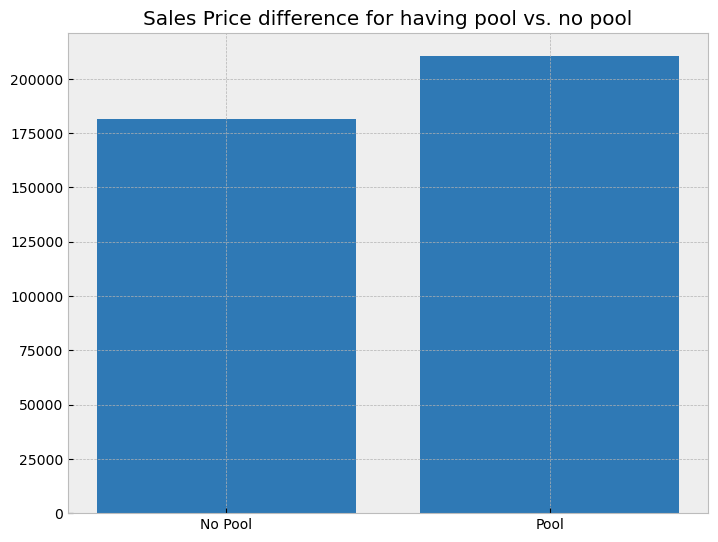

In [19]:
nopool = train[train['poolarea']== 0 ]
poolpresent = train[train['poolarea'] != 0 ]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
pool = ['No Pool', 'Pool']
saleprice = [nopool['saleprice'].mean(),poolpresent['saleprice'].mean()]
ax.bar(pool,saleprice)
ax.set_title('Sales Price difference for having pool vs. no pool')
plt.show()

In [20]:
# Percentage Premium of houses with Pool vs. No Pool
((poolpresent.mean()['saleprice'] / nopool.mean()['saleprice'])-1)*100

16.108114598822333

*Interpretation:*
- There are 9 houses with pools. From common understanding, these values could be missing not at random, where house owners will 'leave the fill blank' if the house does not have a pool. Hence, houses without pool present with missing value for poolqc.
- There is a 16% premium in house prices for houses with pool over houses with no pool. This is a sizeable premium for a big-ticket item.  
- **Data cleaning**: Will be incorporating pool factor into our cleaned data with a boolean indicating if there is a pool or not. 

##### miscfeature

In [21]:
# miscfeature      1986
train['miscfeature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: miscfeature, dtype: int64

In [22]:
train['miscfeature'].fillna(value="nil", inplace=True)
train['miscfeature'].unique()

array(['nil', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

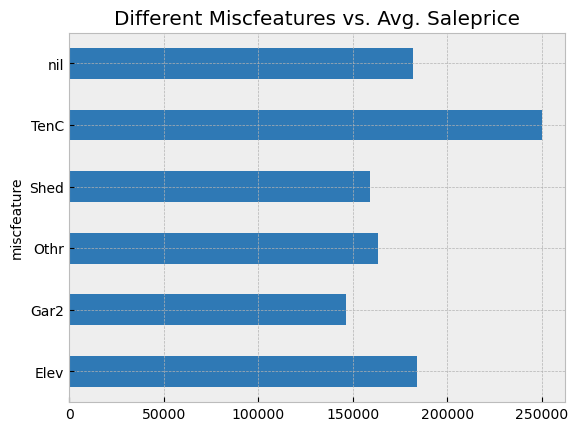

In [23]:
train.groupby('miscfeature').saleprice.mean().plot.barh(fontsize =10,
                                                        title='Different Miscfeatures vs. Avg. Saleprice');

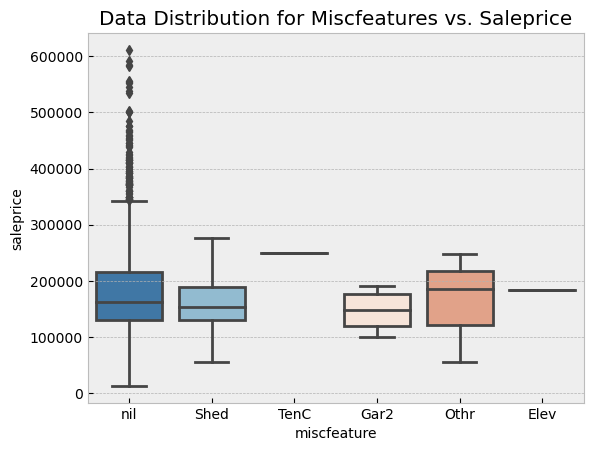

In [24]:
sns.boxplot(x='miscfeature',y='saleprice',data=train).set(title='Data Distribution for Miscfeatures vs. Saleprice');

*Interpretation*
- Even though there are 1986 null figures in the miscfeature column, salesprice seems rather indifferent to having additional misc. features. Except for tennis court, all the other misc. features have medians that are approximately of the same saleprice level.  
- **Data Cleaning**: Will be dropping this column altogether, as there are too many missing values, and the column does not seem important in determining sales price. Moreover, there is only one house with tennis court (which caused an upwards bias in the sales price). 

##### Alley

In [25]:
# alley             1911
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [26]:
train['alley'].fillna(value="nil", inplace=True)
train['alley'].unique()

array(['nil', 'Pave', 'Grvl'], dtype=object)

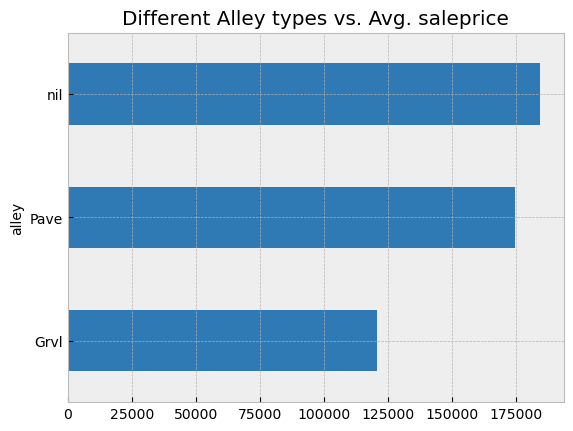

In [27]:
train.groupby('alley').saleprice.mean().plot.barh(title='Different Alley types vs. Avg. saleprice');

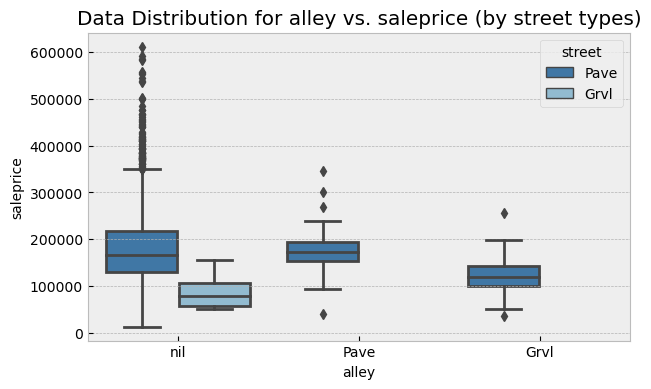

In [28]:
plt.figure(figsize=(7,4))
sns.boxplot(x='alley',y='saleprice',data=train,hue='street').set(title='Data Distribution for alley vs. saleprice (by street types)');

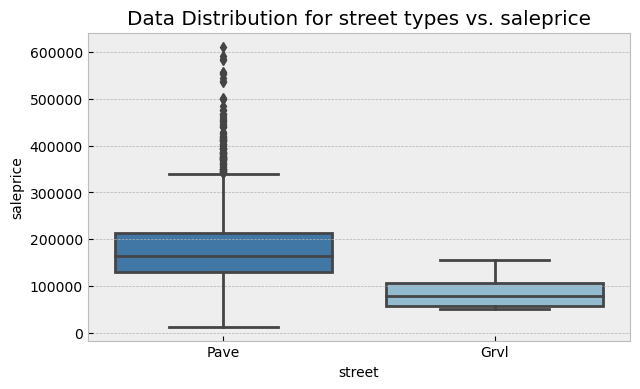

In [29]:
plt.figure(figsize=(7,4))
sns.boxplot(x='street',y='saleprice',data=train).set(title='Data Distribution for street types vs. saleprice');

In [30]:
train[(train['alley'] =='Grvl') &(train['street'] =='Grvl')]

Empty DataFrame
Columns: [id, pid, mssubclass, mszoning, lotfrontage, lotarea, street, alley, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremod/add, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, fireplacequ, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, poolqc, fence, miscfeature, miscval, mosold, yrsold, saletype, saleprice]
Index: []

[0 rows x 81 columns]

In [31]:
train[(train['alley'] =='Pave') &(train['street'] =='Grvl')]

Empty DataFrame
Columns: [id, pid, mssubclass, mszoning, lotfrontage, lotarea, street, alley, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremod/add, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, fireplacequ, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, poolqc, fence, miscfeature, miscval, mosold, yrsold, saletype, saleprice]
Index: []

[0 rows x 81 columns]

*Interpretation*
- It seems that having Pave or Gravel alleys might cause a downward bias in sales prices.
- Initial suspicion that alley is correlated with street confirmed by above boxplot:
    - For Paved Alley, there will only be Paved streets.
    - For Gravel Alley, there will only be Paved streets. 
    - **Houses with alley access ONLY has paved streets.** 
    - Since paved streets fetch higher premium over gravel streets, we can conclude that houses with alley access (pave/gravel) will likely have higher premiums. 
- However, bar chart does not indicate so. This shows that alley is not a good indicator of sales price. 
- Moreover, if we include this variable together with "street" in our regression, there is high likelihood that there will be increased multi-collinearity in our model. Hence, we will drop Alley column.
- **Data Cleaning**: To drop column "Alley"

##### Fence and Fireplacequ

In [32]:
# fence             1651
# fireplacequ      1000
print(train['fence'].value_counts())
print(train['fireplacequ'].value_counts())

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplacequ, dtype: int64


*Interpretation*: 
- From definition, NA figures indicate that house has no fence / fireplace. We will retain these columns.
- **Data Cleaning**: To change the null values to be 'NA'.

##### Lot Frontage

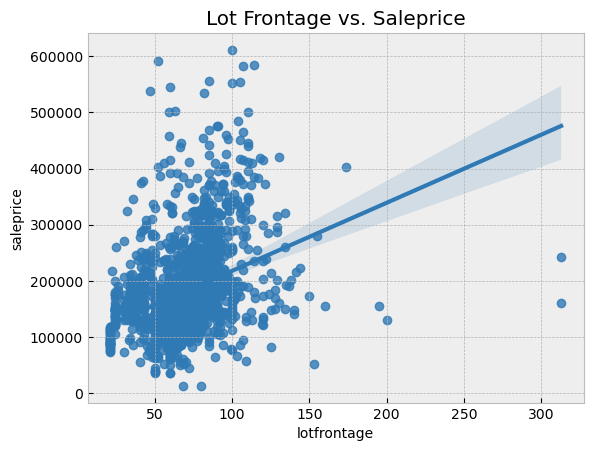

In [33]:
# lotfrontage       330
sns.regplot(x='lotfrontage',y='saleprice',data=train).set_title('Lot Frontage vs. Saleprice');

In [34]:
# Understanding lotfrontage correlation with saleprice
train['lotfrontage'].corr(train['saleprice'])

0.3418424837268712

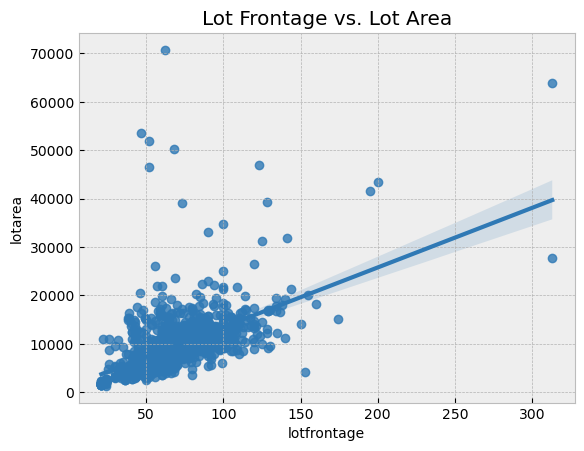

In [35]:
sns.regplot(x='lotfrontage',y='lotarea',data=train).set_title('Lot Frontage vs. Lot Area');

In [36]:
# Understanding lotfrontage correlation with lotarea (is there multi-collinearity issues?)
train['lotfrontage'].corr(train['lotarea'])

0.5740243171179968

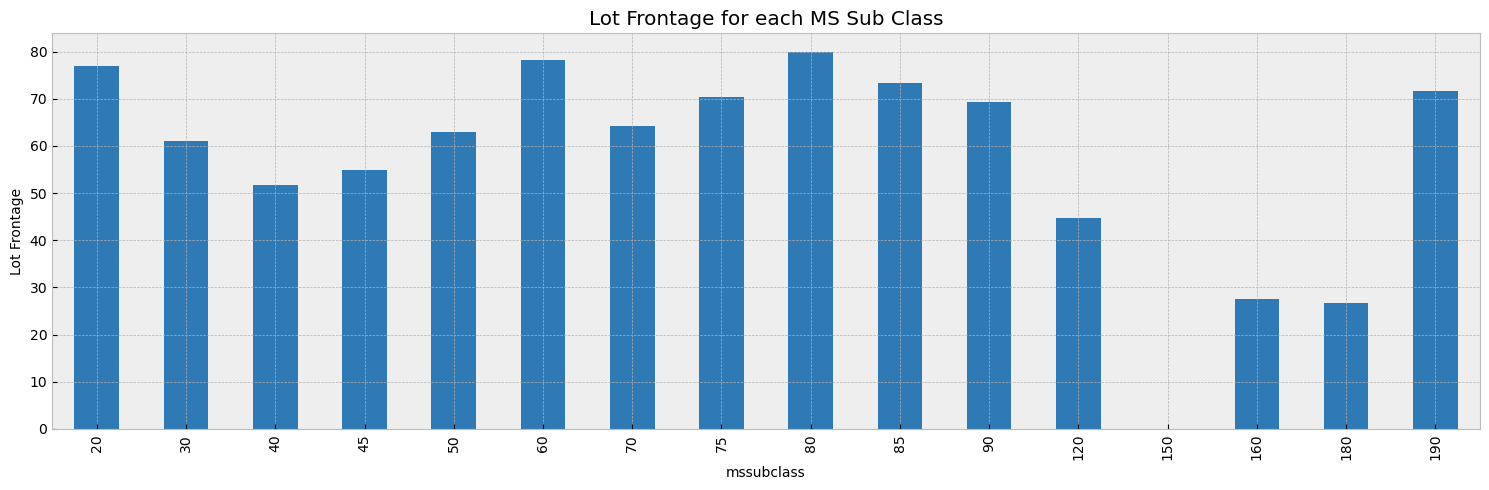

In [37]:
# Understanding relationship between lotfrontage and mssubclass. 
fig, ax = plt.subplots(figsize= (15,5))
train.groupby('mssubclass').lotfrontage.mean().plot.bar()
ax.set_ylabel('Lot Frontage')
ax.set_title('Lot Frontage for each MS Sub Class')
fig.tight_layout();

In [38]:
train[(train['lotfrontage'].isnull()) & (train['mssubclass'] != 150)].groupby('mssubclass').count()

id  pid  mszoning  lotfrontage  lotarea  street  alley  lotshape  \
mssubclass                                                                      
20          131  131       131            0      131     131    131       131   
30            9    9         9            0        9       9      9         9   
50           16   16        16            0       16      16     16        16   
60           86   86        86            0       86      86     86        86   
70            6    6         6            0        6       6      6         6   
75            1    1         1            0        1       1      1         1   
80           23   23        23            0       23      23     23        23   
85           10   10        10            0       10      10     10        10   
90           12   12        12            0       12      12     12        12   
120          23   23        23            0       23      23     23        23   
160           8    8         8            0        8       8      8         8   
180           1    1         1            0        1       1      1         1   
190           3    3         3            0        3       3      3         3   

            landcontour  utilities  ...  screenporch  poolarea  poolqc  fence  \
mssubclass                          ...                                         
20                  131        131  ...          131       131       0     44   
30                    9          9  ...            9         9       0      2   
50                   16         16  ...           16        16       0      2   
60                   86         86  ...           86        86       0     10   
70                    6          6  ...            6         6       0      3   
75                    1          1  ...            1         1       0      0   
80                   23         23  ...           23        23       1      8   
85                   10         10  ...           10        10       0      3   
90                   12         12  ...           12        12       0      0   
120                  23         23  ...           23        23       0      0   
160                   8          8  ...            8         8       0      1   
180                   1          1  ...            1         1       0      0   
190                   3          3  ...            3         3       0      0   

            miscfeature  miscval  mosold  yrsold  saletype  saleprice  
mssubclass                                                             
20                  131      131     131     131       131        131  
30                    9        9       9       9         9          9  
50                   16       16      16      16        16         16  
60                   86       86      86      86        86         86  
70                    6        6       6       6         6          6  
75                    1        1       1       1         1          1  
80                   23       23      23      23        23         23  
85                   10       10      10      10        10         10  
90                   12       12      12      12        12         12  
120                  23       23      23      23        23         23  
160                   8        8       8       8         8          8  
180                   1        1       1       1         1          1  
190                   3        3       3       3         3          3  

[13 rows x 80 columns]

*Interpretation*:
- There are multiple MS Subclasses with no lot frontage. It is not only the #150 MS subclass. 
- Missing lot frontage values simply shows that these houses do not have lot frontage, ie. house is not connected to street. 
- Moreover, lotfrontage is weakly correlated to saleprices, suggesting that we should drop this column as this is not telling for our regression model.
- **Data Cleaning**: Suggest to drop column. 

##### Basement-typed features

In [39]:
# bsmtexposure       58
# bsmtfintype2       56
# bsmtfintype1       55
# bsmtcond           55
# bsmtqual           55

train[(train['bsmtqual'].isnull()) 
      & (train['bsmtcond'].isnull())
      & (train['bsmtfintype1'].isnull())
      & (train['bsmtfintype2'].isnull())
      & (train['bsmtexposure'].isnull())].shape

(55, 81)

In [40]:
train[(train['bsmtqual'].isnull()) 
      & (train['bsmtcond'].isnull())
      & (train['bsmtfintype1'].isnull())].shape

(55, 81)

In [41]:
train[(train['bsmtexposure'].isnull()) 
      & (~train['bsmtqual'].isnull())].filter(like = 'bsmt')

bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  \
1456       Gd       TA          NaN          Unf         0.0          Unf   
1547       Gd       TA          NaN          Unf         0.0          Unf   
1997       Gd       TA          NaN          Unf         0.0          Unf   

      bsmtfinsf2  bsmtunfsf  totalbsmtsf  bsmtfullbath  bsmthalfbath  
1456         0.0      725.0        725.0           0.0           0.0  
1547         0.0     1595.0       1595.0           0.0           0.0  
1997         0.0      936.0        936.0           0.0           0.0

In [42]:
train[(train['bsmtfintype2'].isnull()) 
      & (~train['bsmtqual'].isnull())].filter(like = 'bsmt')

bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  \
1147       Gd       TA           No          GLQ      1124.0          NaN   

      bsmtfinsf2  bsmtunfsf  totalbsmtsf  bsmtfullbath  bsmthalfbath  
1147       479.0     1603.0       3206.0           1.0           0.0

*Interpretation:*
- Missing bsmt information shows that the house does not have a basement. 
- All 5 bsaement-related columns have co-occuring missing values, except for 3 houses. 
- Results show that all three houses have a basement with missing basement exposure datapoint. However, the 'BsmtExposure' column is wrongly imputed. It should be "No" (assuming no exposure, hence missing value).
- Results show that 1 house have a basement with missing basement fintype2 datapoint. This datapoint is wrongly imputed. 
- **Data Cleaning:**
    - To fill missing "bsmtfintype2" value for index 1147 with mode. 
    - To fill missing "bsmtexposure" values for the 3 index with "No".

##### Mansory Veneer-typed features

In [43]:
# masvnrtype        22
# masvnrarea        22
print(train['masvnrtype'].value_counts())
print(f"Number of unique values: {train['masvnrtype'].nunique()}")

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: masvnrtype, dtype: int64
Number of unique values: 4


In [44]:
train[train['masvnrarea'] == 0].shape
#There are 1216 houses with no mansory.

(1216, 81)

In [45]:
train[train['masvnrarea'].isnull()].shape
#There are 1216 houses with no mansory.

(22, 81)

In [46]:
train[train['masvnrarea'].isnull()]['masvnrtype']
# All 22 missing masvnrarea data have missing masvnrtypes as well. 

22      NaN
41      NaN
86      NaN
212     NaN
276     NaN
338     NaN
431     NaN
451     NaN
591     NaN
844     NaN
913     NaN
939     NaN
1025    NaN
1244    NaN
1306    NaN
1430    NaN
1434    NaN
1606    NaN
1699    NaN
1815    NaN
1820    NaN
1941    NaN
Name: masvnrtype, dtype: object

In [47]:
train[(train['masvnrtype']== "None") & (train['masvnrarea'] != 0)].filter(like='mas')

masvnrtype  masvnrarea
765        None         1.0
810        None       288.0
1148       None         1.0
1684       None         1.0
1832       None       344.0

In [48]:
train[(train['masvnrtype']!= "None") & (train['masvnrarea'] == 0)].filter(like='mas')

masvnrtype  masvnrarea
669     BrkFace         0.0
1136    BrkFace         0.0
1187      Stone         0.0

brickface type masvnrarea avg:
254.63015873015874


stone type masvnrarea avg:
230.41071428571428


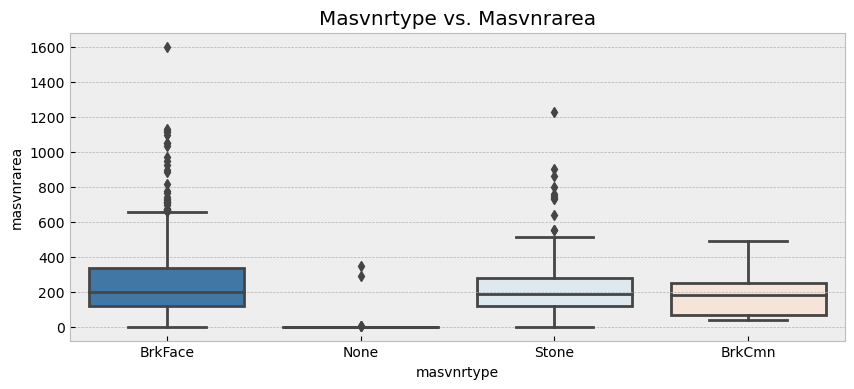

In [49]:
plt.figure(figsize=(10,4))
print('brickface type masvnrarea avg:')
print(train[train['masvnrtype']=="BrkFace"].mean()['masvnrarea'])
print('\n')
print('stone type masvnrarea avg:')
print(train[train['masvnrtype']=="Stone"].mean()['masvnrarea'])
sns.boxplot(x='masvnrtype',y='masvnrarea',data=train).set_title("Masvnrtype vs. Masvnrarea");

In [50]:
train['masvnrarea'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: masvnrarea, dtype: float64

In [51]:
train[(train['masvnrarea']<=20)&(train['masvnrarea']!=0)].filter(like='mas').sort_values(by="masvnrarea",ascending=False)

masvnrtype  masvnrarea
1944    BrkFace        20.0
1182      Stone        20.0
208     BrkFace        18.0
1813    BrkFace        18.0
1281    BrkFace        16.0
215     BrkFace        16.0
277     BrkFace        16.0
1825    BrkFace        16.0
846     BrkFace        16.0
890     BrkFace        16.0
204       Stone        16.0
1781    BrkFace        16.0
1250    BrkFace        16.0
1044    BrkFace        14.0
640     BrkFace        14.0
25      BrkFace         3.0
1684       None         1.0
1148       None         1.0
765        None         1.0

*Interpretation:*
- There are 22 missing 'masvnrarea' values, suggesting that they have no mansory. *wrongly imputed data*.
- There are 3 "masvnrtype" = None values but the masvnrarea = 1.0. Believe that it is a wrongly imputed data. 

- **Data Cleaning:**
    - To fill missing "masvnrarea" values with 0. 
    - To fill missing "masvnrtype" values with None.
    - Change "masvnrtype"=None masvnrarea to be 0.
    - For area = 0, BrkFace to fill with 254.63015873015874 (#669,#1136)
        - train[train['masvnrtype']=="BrkFace"].mean()['masvnrarea'] 
    - For area = 0, Stone to fill with 230.41071428571428 (#1187)
        - train[train['masvnrtype']=="Stone"].mean()['masvnrarea'] 
    - For type = None, #810, #1832 will be filled with mode: "BrkFace"

##### Basement-typed features

In [52]:
# bsmthalfbath       2
# bsmtfullbath       2
# bsmtunfsf          1
# bsmtfinsf2         1
# totalbsmtsf        1
# bsmtfinsf1         1
print(train['bsmthalfbath'].value_counts())
print(train['bsmtfullbath'].value_counts())

0.0    1923
1.0     122
2.0       4
Name: bsmthalfbath, dtype: int64
0.0    1200
1.0     824
2.0      23
3.0       2
Name: bsmtfullbath, dtype: int64


In [53]:
train[(train['bsmthalfbath'].isnull())].filter(like='bsmt')

bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  \
616       NaN      NaN          NaN          NaN         0.0          NaN   
1327      NaN      NaN          NaN          NaN         NaN          NaN   

      bsmtfinsf2  bsmtunfsf  totalbsmtsf  bsmtfullbath  bsmthalfbath  
616          0.0        0.0          0.0           NaN           NaN  
1327         NaN        NaN          NaN           NaN           NaN

In [54]:
bsmt = train.filter(like="bsmt")
print(round(bsmt.min(),1))
print('\n')
print(bsmt.info())

bsmtfinsf1      0.0
bsmtfinsf2      0.0
bsmtunfsf       0.0
totalbsmtsf     0.0
bsmtfullbath    0.0
bsmthalfbath    0.0
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bsmtqual      1996 non-null   object 
 1   bsmtcond      1996 non-null   object 
 2   bsmtexposure  1993 non-null   object 
 3   bsmtfintype1  1996 non-null   object 
 4   bsmtfinsf1    2050 non-null   float64
 5   bsmtfintype2  1995 non-null   object 
 6   bsmtfinsf2    2050 non-null   float64
 7   bsmtunfsf     2050 non-null   float64
 8   totalbsmtsf   2050 non-null   float64
 9   bsmtfullbath  2049 non-null   float64
 10  bsmthalfbath  2049 non-null   float64
dtypes: float64(6), object(5)
memory usage: 176.4+ KB
None


*Interpretation:*
- Believe that the two missing values for each categories represents 0.0 bathrooms.
- For bsmtunfsf,bsmtunfsf2,totlabsmtsf, bsmtfinsf1, the null values are presented by #1327. 
- Since they are float objects, with minimums that are 0.0, I can replace the null values with 0.0.

- **Data Cleaning:**
    - To fill bsmthalfbath and bsmtfullbath to be 0.0
    - To fill bsmtunfsf,bsmtunfsf2,totlabsmtsf, bsmtfinsf1 for #1327 with 0.0.

##### Garage-typed Features

In [55]:
# garagefinish      114
# garagecond        114
# garagequal        114
# garageyrblt       114
# garagetype        113
# garagecars          1
# garagearea          1

train[(train['garagefinish'].isnull()) 
      & (train['garagecond'].isnull())
      & (train['garagequal'].isnull())
      & (train['garageyrblt'].isnull())
      & (train['garagetype'].isnull())].shape

(113, 81)

In [56]:
train[(train['garagefinish'].isnull()) 
      & (~train['garagetype'].isnull())].filter(like = 'garage')

garagetype  garageyrblt garagefinish  garagecars  garagearea garagequal  \
1712     Detchd          NaN          NaN         NaN         NaN        NaN   

     garagecond  
1712        NaN

In [57]:
train.iloc[1712,:].isnull().value_counts()

False    73
True      8
Name: 1712, dtype: int64

In [58]:
train[(train['garagecars'].isnull())].filter(like='garage')

garagetype  garageyrblt garagefinish  garagecars  garagearea garagequal  \
1712     Detchd          NaN          NaN         NaN         NaN        NaN   

     garagecond  
1712        NaN

Detached type garagecars avg:
1.5588785046728972
Detached type garagearea avg:
419.54392523364487


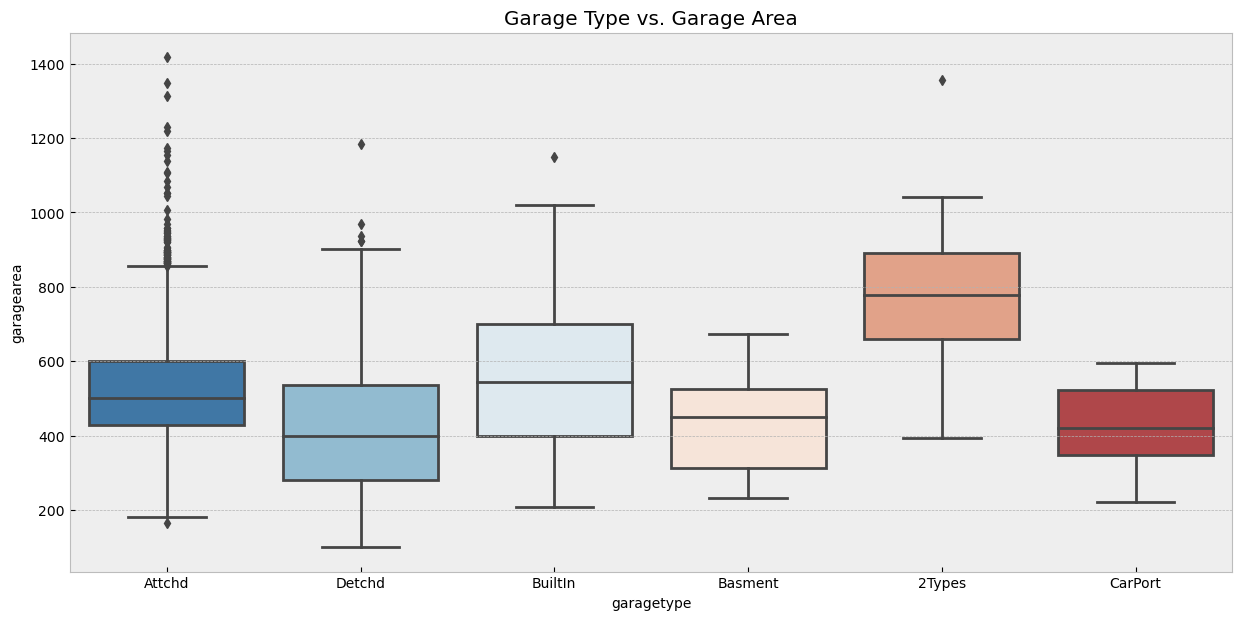

In [59]:
plt.figure(figsize=(15,7))
print('Detached type garagecars avg:')
print(train[train['garagetype']=="Detchd"].mean()['garagecars'])
print('Detached type garagearea avg:')
print(train[train['garagetype']=="Detchd"].mean()['garagearea'])
sns.boxplot(x='garagetype',y='garagearea',data=train).set_title("Garage Type vs. Garage Area");

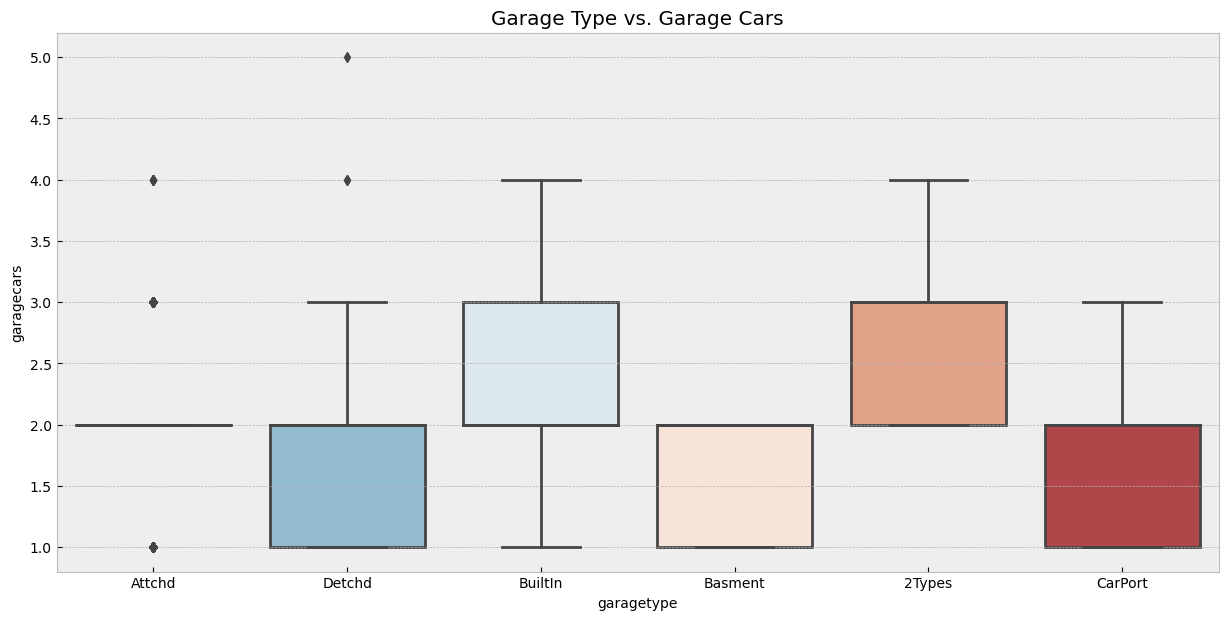

In [60]:
plt.figure(figsize=(15,7))
sns.boxplot(x='garagetype',y='garagecars',data=train).set_title("Garage Type vs. Garage Cars");

*Interpretation:*
- Missing garage information shows that the house does not have a garage. 
- All 5 garage-related columns have co-occuring missing values, except for 1 house. 
- Index 1712 has a Detached garage but no other information about garage. 
- We will not drop #1712 because it has majority of its information filled. 

- **Data Cleaning:**
    - To fill garagecar and garagearea of #1712 with mean of "Detached" garage type. 
        - train[train['garagetype']=="Detchd"].mean()['garagearea']
        - train[train['garagetype']=="Detchd"].mean()['garagecars']
    - To map garagetype 'null' to be NA. 
    - To map garagearea/garagecar 'null' to be 0.
    - To map garagefinish 'null' to be 0.
    - To map garagequal, garagecond 'null' to be 0.

### Checking for Numerical Anomalies

In [61]:
train_num.head()

id        pid  mssubclass  lotfrontage  lotarea  overallqual  overallcond  \
0  109  533352170          60          NaN    13517            6            8   
1  544  531379050          60         43.0    11492            7            5   
2  153  535304180          20         68.0     7922            5            7   
3  318  916386060          60         73.0     9802            5            5   
4  255  906425045          50         82.0    14235            6            8   

   yearbuilt  yearremod/add  masvnrarea  ...  wooddecksf  openporchsf  \
0       1976           2005       289.0  ...           0           44   
1       1996           1997       132.0  ...           0           74   
2       1953           2007         0.0  ...           0           52   
3       2006           2007         0.0  ...         100            0   
4       1900           1993         0.0  ...           0           59   

   enclosedporch  3ssnporch  screenporch  poolarea  miscval  mosold  yrsold  \
0              0          0            0         0        0       3    2010   
1              0          0            0         0        0       4    2009   
2              0          0            0         0        0       1    2010   
3              0          0            0         0        0       4    2010   
4              0          0            0         0        0       3    2010   

   saleprice  
0     130500  
1     220000  
2     109000  
3     174000  
4     138500  

[5 rows x 39 columns]

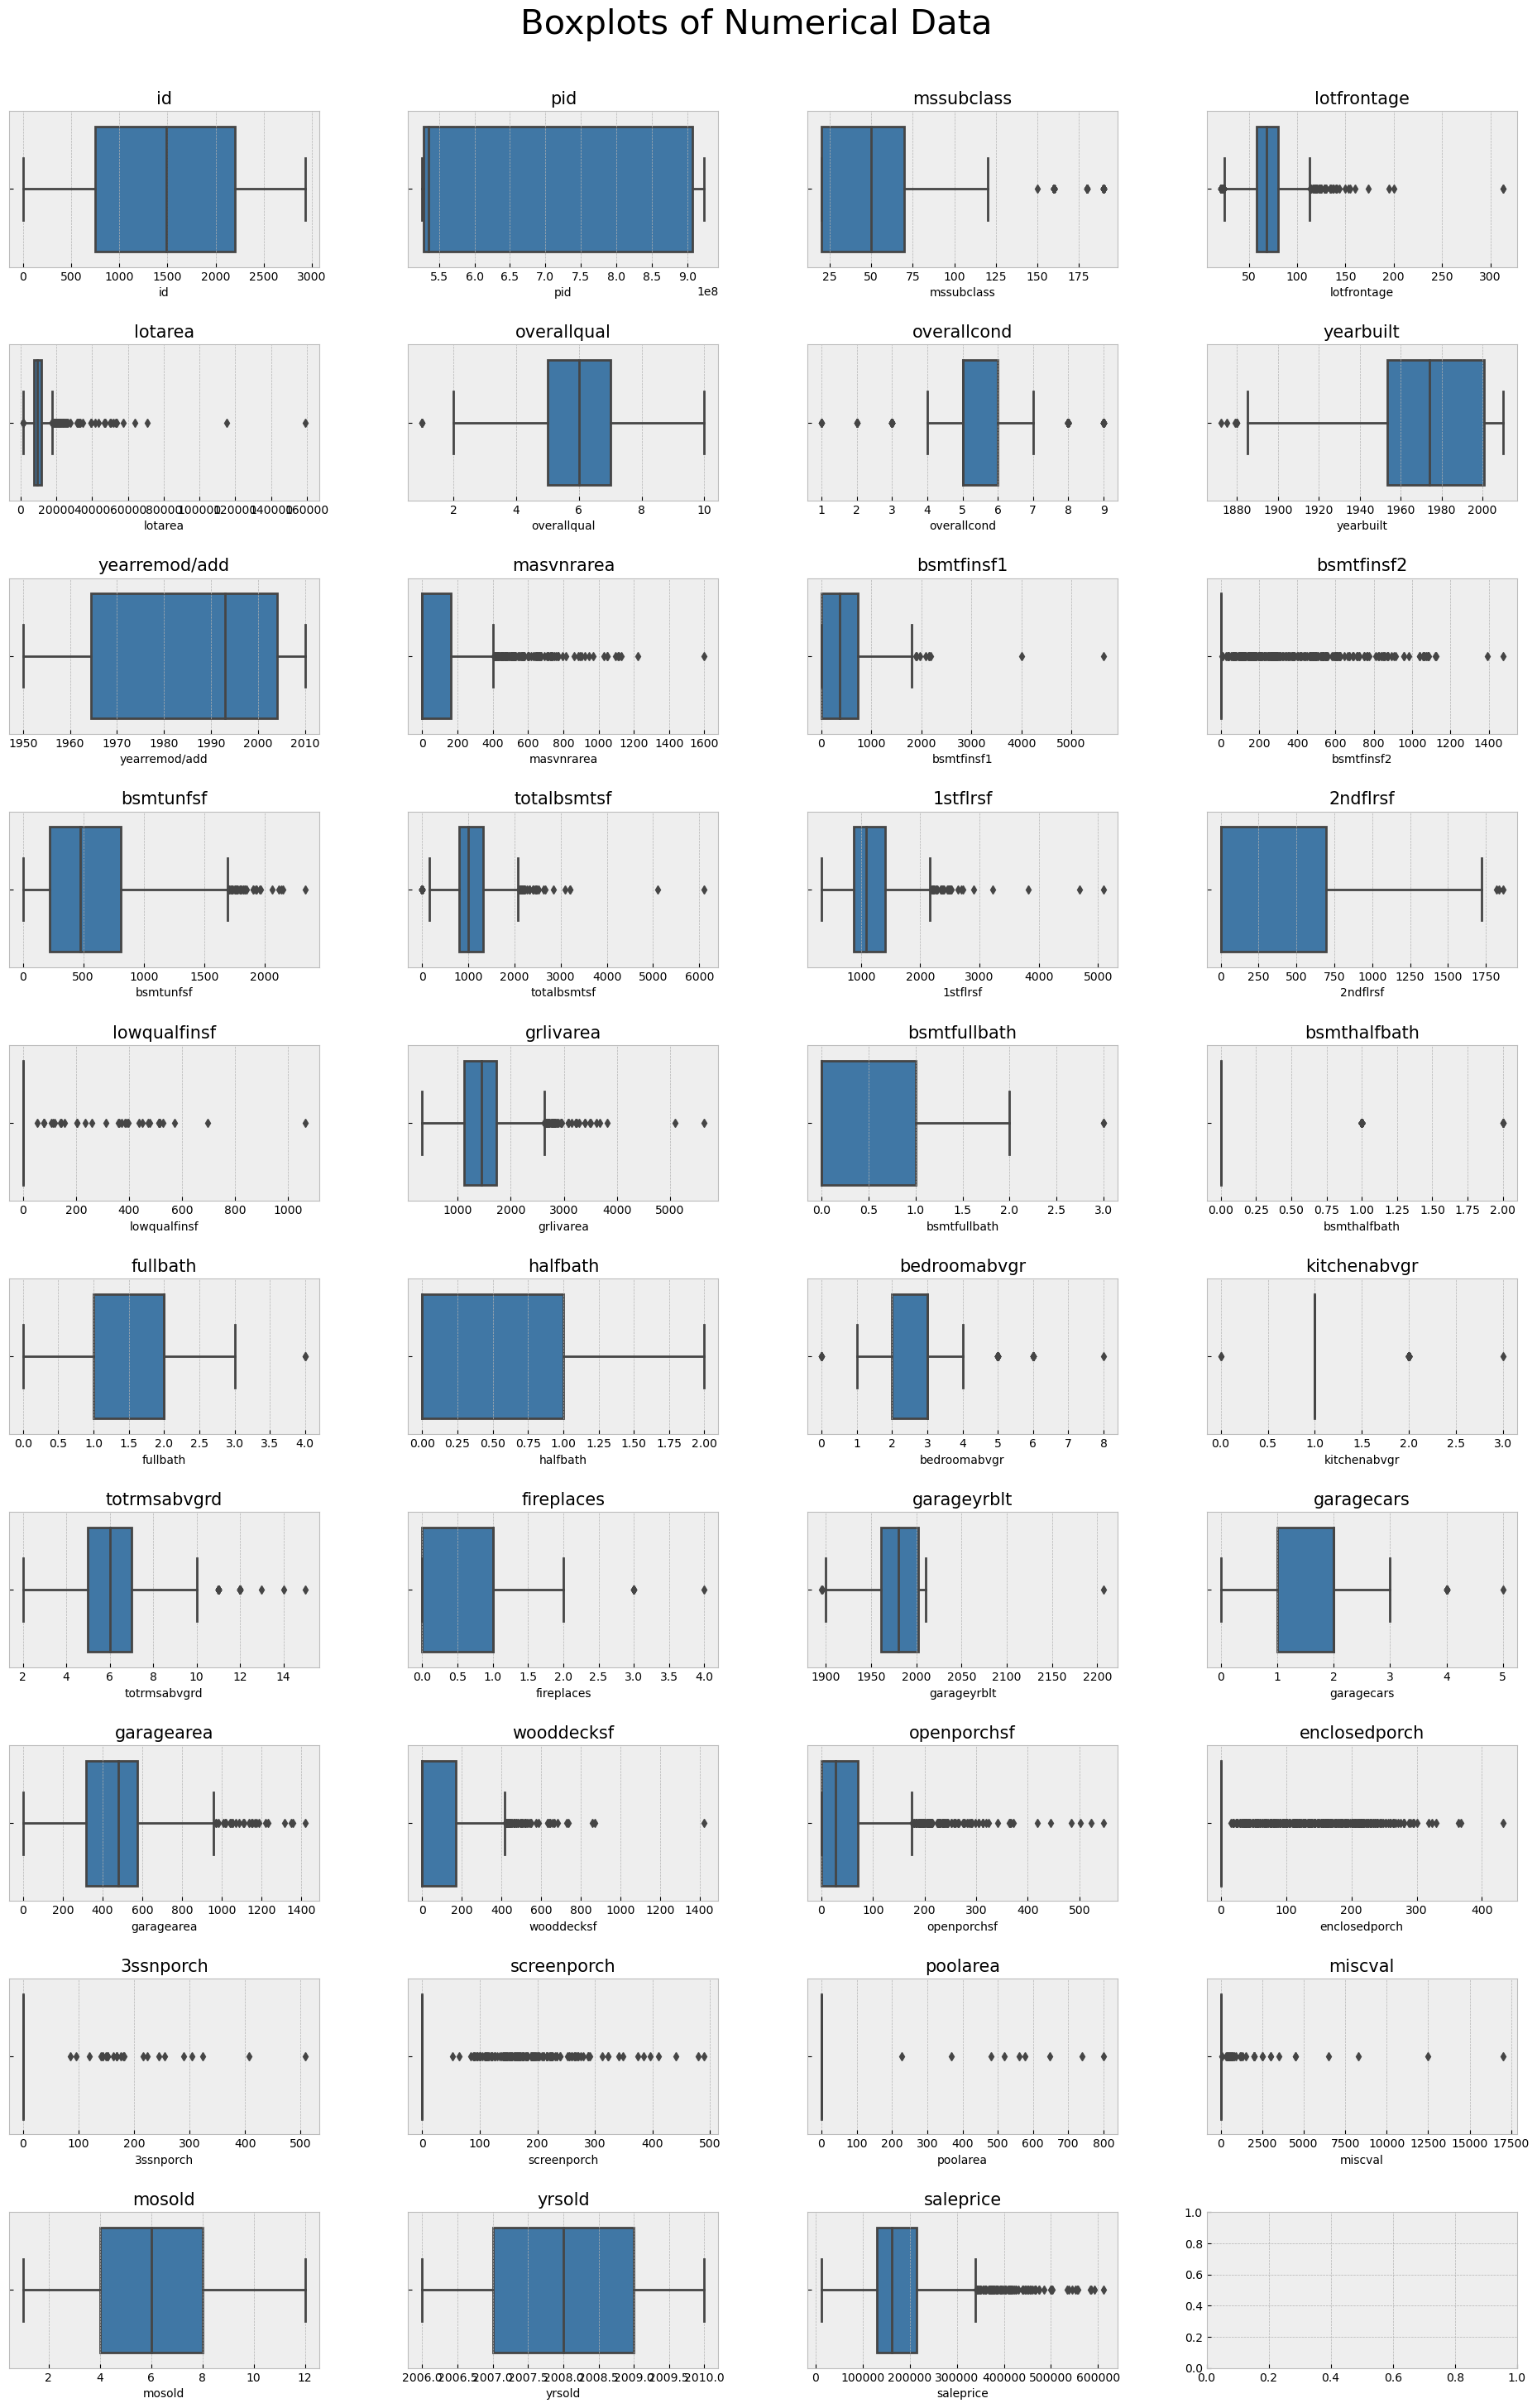

In [62]:
subplot_num_boxplot(train_num,train_num.columns, 
                "Boxplots of Numerical Data", train_num.columns,(20,30));

**Initial Observations**
1. id,pid: To be removed as they are insignificant in our regression. 
2. mssubclass: To be reclassified as a string object as they are categorical. Numerical format does not make sense.
3. To check lotfrontage abnormaly. 
4. To check lotarea abnormalies
5. To check yearbuilt abnormalies (below 1900) - Cross-compare with overall quality/condition and year renovated. 
6. To check abnormalies for totalbsmtsf
7. lowqualfinsf,enclosedporch, 3ssnporc, screenporch, poolarea and miscval are extremely skewed in its distribution.
8. To check abnormaly for garageyrbuilt. 
9. To check abnormaly for wooddecksf


*Will not be doing data cleaning at this stage*

In [63]:
#3: lotfrontage
train_num[train_num['lotfrontage']>160].sort_values(by='saleprice',ascending =False)

id        pid  mssubclass  lotfrontage  lotarea  overallqual  \
1263   496  528321010          60        174.0    15138            8   
1335  1266  535427070          20        313.0    27650            7   
960   1499  908154235          60        313.0    63887           10   
441   1639  527226040         190        195.0    41600            5   
1875  2279  923202220          20        200.0    43500            3   

      overallcond  yearbuilt  yearremod/add  masvnrarea  ...  wooddecksf  \
1263            5       1995           1996       506.0  ...           0   
1335            7       1960           2007         0.0  ...           0   
960             5       2008           2008       796.0  ...         214   
441             5       1969           1990         0.0  ...         144   
1875            5       1953           1953         0.0  ...         483   

      openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  miscval  \
1263          146            202          0            0         0        0   
1335            0              0          0            0         0        0   
960           292              0          0            0       480        0   
441             0              0          0            0         0        0   
1875          266              0          0            0       561        0   

      mosold  yrsold  saleprice  
1263       7    2009     403000  
1335      11    2008     242000  
960        1    2008     160000  
441       11    2007     155000  
1875       6    2007     130000  

[5 rows x 39 columns]

correlation:
0.5740243171179968


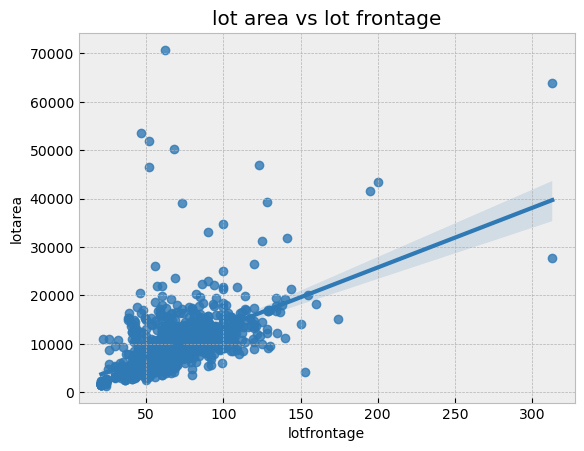

In [64]:
# Does high lot frontage affect lot area? Since both lot frontage and lot area have anomalies. 

sns.regplot(x='lotfrontage',y='lotarea',data=train_num).set_title("lot area vs lot frontage");
print('correlation:')
print(train['lotfrontage'].corr(train['lotarea']))

**Definition:** LotFrontage (float): Linear feet of street connected to property
- From data above, we do not observe significant relationship between having high lotfrontage and high lotarea (R-square = 0.57)
- From analysis above, lotfrontage is weakly correlated to saleprice (R-square of ~0.3). 
- We will not be addressing this anomalies, as having an abnormally high lotfrontage does not intuitively suggest that house will be very affected in any way (based on definition of lotfrontage). 

In [65]:
#4: lotarea
train_num[train_num['lotarea']>75000].sort_values(by='saleprice',ascending =False)

id        pid  mssubclass  lotfrontage  lotarea  overallqual  \
694  2072  905301050          20          NaN   115149            7   
471  2116  906426060          50          NaN   159000            6   

     overallcond  yearbuilt  yearremod/add  masvnrarea  ...  wooddecksf  \
694            5       1971           2002       351.0  ...         380   
471            7       1958           2006       472.0  ...           0   

     openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  miscval  \
694           48              0          0            0         0        0   
471           98              0          0            0         0      500   

     mosold  yrsold  saleprice  
694       6    2007     302000  
471       6    2007     277000  

[2 rows x 39 columns]

correlation:
0.29656583236677886


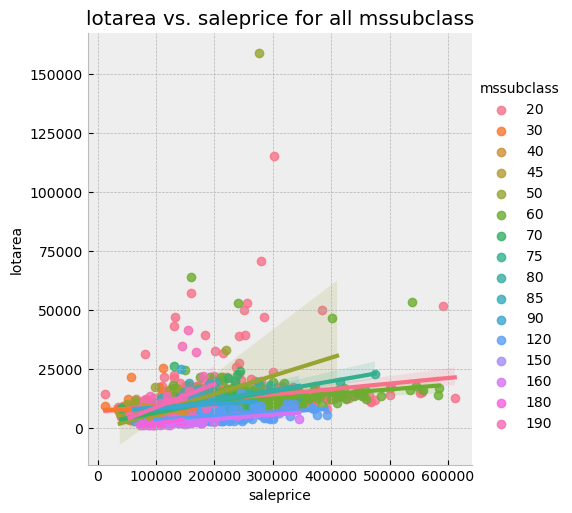

In [66]:
#4: lotarea vs. sales price
sns.lmplot(x='saleprice',y='lotarea',data=train_num,hue='mssubclass')
plt.title('lotarea vs. saleprice for all mssubclass');
print('correlation:')
print(train['saleprice'].corr(train['lotarea']))

correlation:
0.23872433668316131


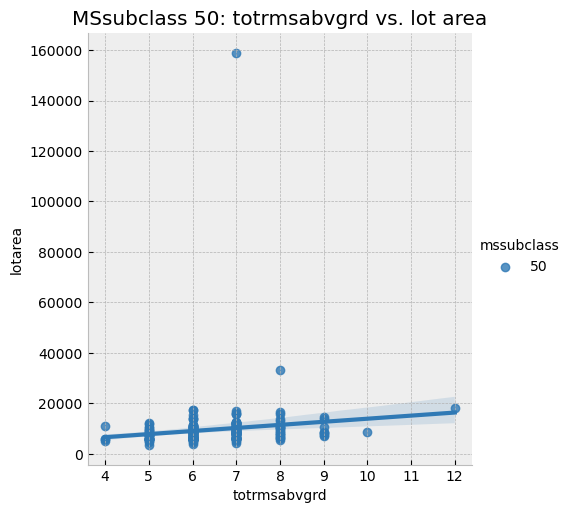

In [67]:
#4: lotarea of MSsubclass 50 vs. total bedrooms above ground.
sns.lmplot(x='totrmsabvgrd',y='lotarea',data=train[train['mssubclass']==50],hue='mssubclass')
plt.title('MSsubclass 50: totrmsabvgrd vs. lot area')
print('correlation:')
print(train['totrmsabvgrd'].corr(train['lotarea']))

correlation:
0.23872433668316131


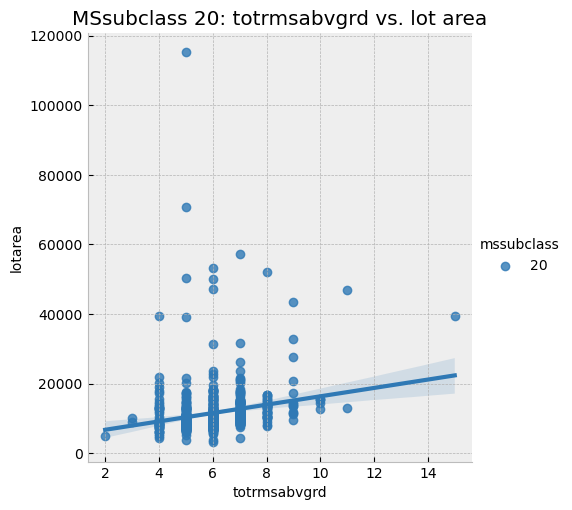

In [68]:
#4: lotarea of MSsubclass 20 vs. total bedrooms above ground.
sns.lmplot(x='totrmsabvgrd',y='lotarea',data=train[train['mssubclass']==20],hue='mssubclass');
plt.title('MSsubclass 20: totrmsabvgrd vs. lot area')
print('correlation:')
print(train['totrmsabvgrd'].corr(train['lotarea']))

In [69]:
print(f'# of null values for 1st abnormaly: {round(100*(train.iloc[694,:].isnull().sum())/train.shape[1],2)}%')
print(f'# of null values for 2nd abnormaly: {round(100*(train.iloc[471,:].isnull().sum())/train.shape[1],2)}%')

# of null values for 1st abnormaly: 3.7%
# of null values for 2nd abnormaly: 3.7%


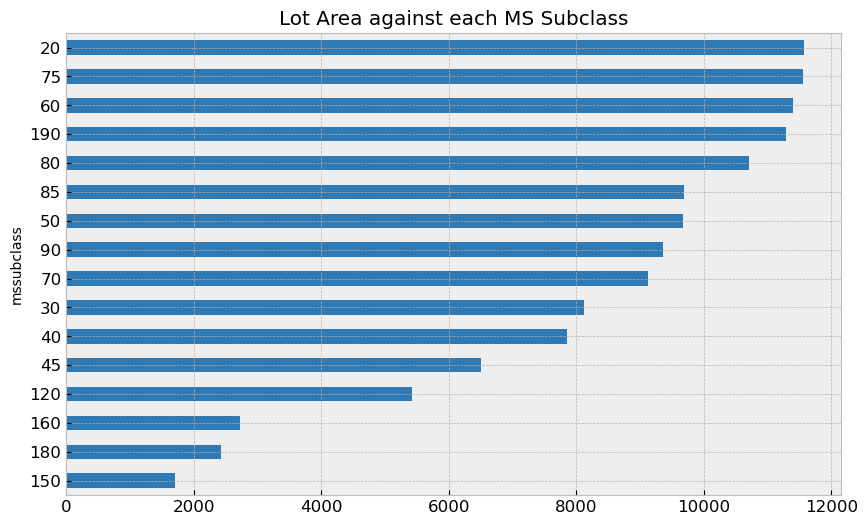

In [70]:
train_num['lotarea'].groupby(train_num['mssubclass']).mean().sort_values().plot(kind='barh',
                                                                                title ="Lot Area against each MS Subclass", 
                                                                                figsize=(10, 6), 
                                                                                fontsize=12);

**Observations:**
1. Comparing the number of bedrooms for the two abnormalies against the rest of the houses under the same MSsubclass, we observet that, indeed, the two houses have lotareas at the far extreme. This is somewhat unbelievable. 
2. As we observe the lmplot of lotarea against salesprice, with hue = mssubclass, we see that for mssubclass=50, the regression line has been skewed upwards due to that single datapoint.
3. Due to the above reasonings, I will drop the rows as they will create additional noise in our model. 

In [71]:
# To check yearbuilt abnormalies (below 1900) - Cross-compare with overall quality/condition and year renovated. 
train_num[train_num['yearbuilt']<1900].sort_values(by='yearbuilt',ascending =False)[['yearbuilt','garageyrblt','saleprice','yearremod/add','overallcond']]

yearbuilt  garageyrblt  saleprice  yearremod/add  overallcond
1359       1898       1910.0     106000           1965            5
410        1896       1896.0      50138           1950            7
1793       1895       1895.0      89000           1950            7
457        1895          NaN     148000           1999            9
28         1895          NaN     119600           2006            6
1141       1893       1988.0     325000           2000            9
1035       1892       1993.0     475000           1993            9
918        1890       1963.0     124900           1996            6
175        1890       1950.0     184000           1999            7
501        1890       1959.0      78500           1998            5
1318       1890       1996.0     159500           1998            8
1204       1890          NaN      95000           1996            9
394        1885       1971.0     122500           1950            6
12         1880       1900.0     131000           2007            7
784        1880       1930.0     117500           1950            4
1939       1880       2003.0     295000           2002            9
1134       1879       1950.0     185000           1987            8
136        1875          NaN      94000           1996            8
951        1872          NaN     122000           1987            5

correlation:
-0.37098822084328875


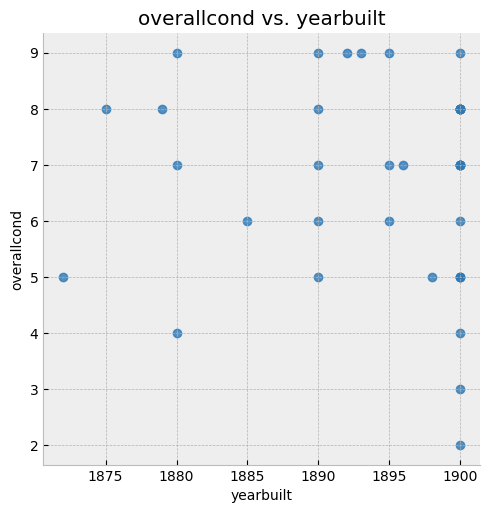

In [72]:
sns.lmplot(x='yearbuilt',y='overallcond',data=train_num[train_num['yearbuilt']<1901],fit_reg=False);
plt.title('overallcond vs. yearbuilt');
print('correlation:')
print(train['overallcond'].corr(train['yearbuilt']))

correlation:
0.6291163808227809


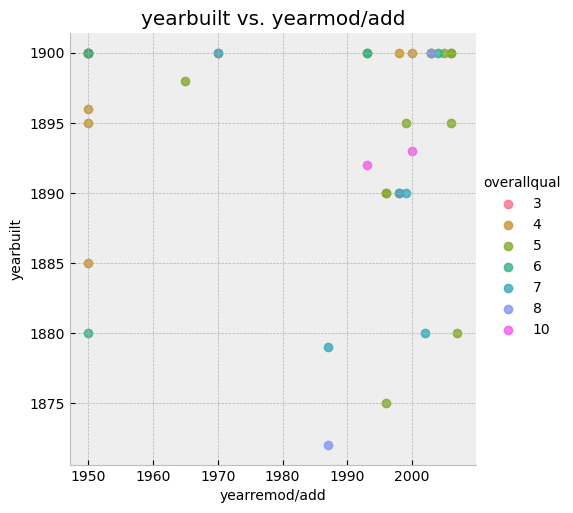

In [73]:
# checking year built vs. yearremod/add
sns.lmplot(x='yearremod/add',y='yearbuilt',data=train_num[train_num['yearbuilt']<1901],fit_reg=False,hue='overallqual');
plt.title('yearbuilt vs. yearmod/add');
print('correlation:')
print(train['yearremod/add'].corr(train['yearbuilt']))

**Observations**
1. There are many houses built before 1900 that has overall condition above 5. This is strange, hence I compared it against yearremod/add.
2. It appears that all of the houses before 1900 has been renovated from 1950 onwards. Hence, the overall condition/quality of the house has is not terrible. Houses that renovated recently has a higher quality. 
3. No conclusion can be derived from this observation.

In [74]:
# To check abnormalies for totalbsmtsf > 4000
train_num[train_num['totalbsmtsf']>4000].sort_values(by='saleprice',ascending =False).filter(like='bsmt')

bsmtfinsf1  bsmtfinsf2  bsmtunfsf  totalbsmtsf  bsmtfullbath  \
1885      4010.0         0.0     1085.0       5095.0           1.0   
960       5644.0         0.0      466.0       6110.0           2.0   

      bsmthalfbath  
1885           1.0  
960            0.0

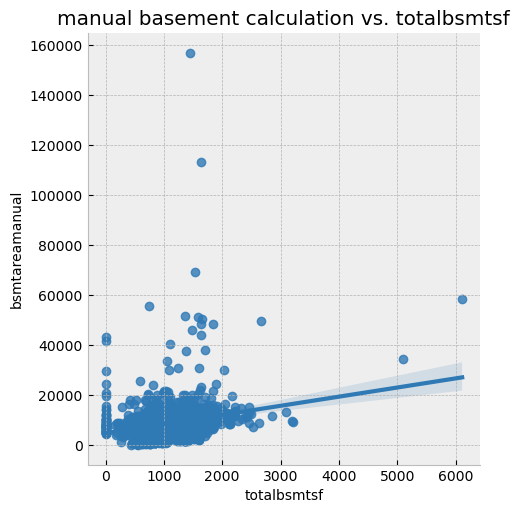

In [75]:
train_num['bsmtareamanual'] = train_num['lotarea']-train_num['grlivarea']
sns.lmplot(x='totalbsmtsf',y='bsmtareamanual',data=train_num)
plt.title('manual basement calculation vs. totalbsmtsf');

0.5389991010394769


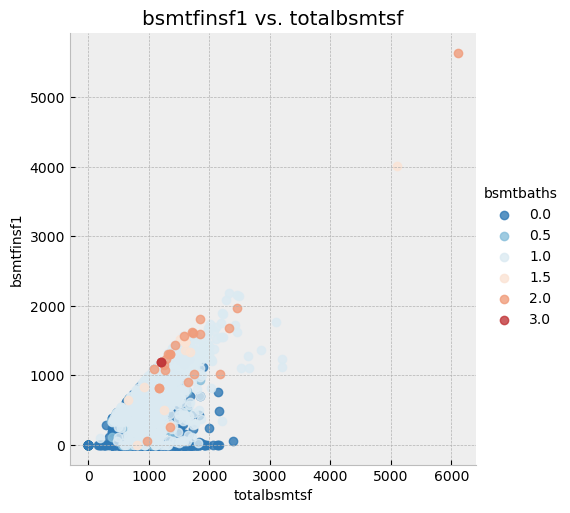

In [76]:
train_num['bsmtbaths'] = train_num['bsmtfullbath']+0.5*train_num['bsmthalfbath']
sns.lmplot(x='totalbsmtsf',y='bsmtfinsf1',data=train_num,hue='bsmtbaths',fit_reg=False)
plt.title('bsmtfinsf1 vs. totalbsmtsf');
print(train['totalbsmtsf'].corr(train['bsmtfinsf1']))

In [77]:
train_num[train_num['totalbsmtsf']>5000]['bsmtfinsf2']

960     0.0
1885    0.0
Name: bsmtfinsf2, dtype: float64

correlation:
0.41923840401611684


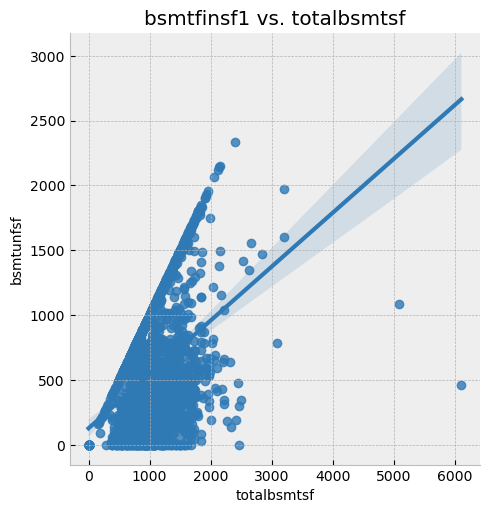

In [78]:
sns.lmplot(x='totalbsmtsf',y='bsmtunfsf',data=train_num)
plt.title('bsmtfinsf1 vs. totalbsmtsf');
print('correlation:')
print(train['totalbsmtsf'].corr(train['bsmtunfsf']))

correlation:
0.6289247057344559


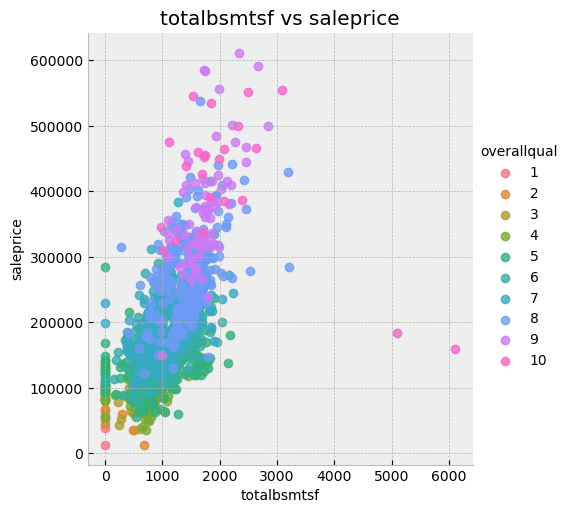

In [79]:
sns.lmplot(x='totalbsmtsf',y='saleprice',data=train_num,hue='overallqual',fit_reg=False)
plt.title('totalbsmtsf vs saleprice');
print('correlation:')
print(train['totalbsmtsf'].corr(train['saleprice']))

correlation:
0.5487421994724723


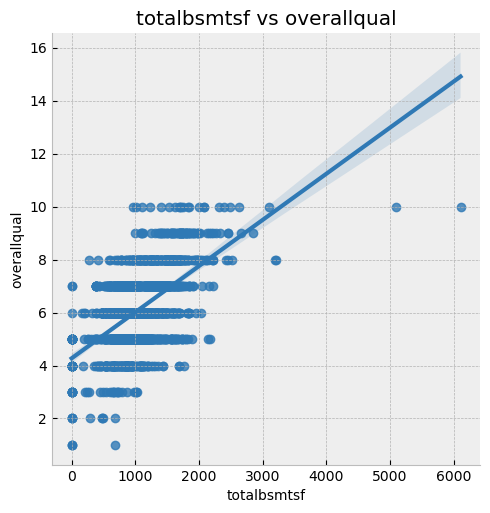

In [80]:
sns.lmplot(x='totalbsmtsf',y='overallqual',data=train_num)
plt.title('totalbsmtsf vs overallqual');
print('correlation:')
print(train['totalbsmtsf'].corr(train['overallqual']))

**Observations**
1. We have two houses with abnomally large totalbsmtsf. We need to check if this is a valid datapoint by cross comparing with other variables available in our dataset, using conventional wisdom
2. With the manually calculated basement squarefeet, the scatterplot of it against totalbsmfsf shows that the two abnormal datapoints are clear outliers. (The two other outliers are accounted for in the 'lotarea' analysis above).
3. totalbsmtsf is highly correlated to bsmtfinsf1. Both of these metrics uniformly shows that the two houses has clear outliers for the basement-related area data. bsmtfinsf2 is absent for the both houses. 
4. From my correlation analysis (Part 2B), 'overallqual' has the highest correlation to saleprice. Based on the above plot of totalbsmfsf over saleprice with hue = "overallqual", we see that the two outliers has an abnormally low saleprice for its high overallqual and high totalbsmfsf.
5. **Data Cleaning**: Will be removing these two rows altogether as this datapoint generally does not make sense from a 'totalbsmtsf' and 'saleprice' perspective.

In [81]:
# lowqualfinsf,enclosedporch, 3ssnporc, screenporch, poolarea and miscval are extremely skewed in its distribution.
# For these, we will conduct further analysis at the below section to come to a conclusion. 
# This includes histogram and statistical analysis. 

In [82]:
#To check abnormaly for garageyrblt. 
train[train['garageyrblt']>2010].sort_values(by='saleprice',ascending =False)[['garageyrblt','yearbuilt','yrsold','yearremod/add']]

garageyrblt  yearbuilt  yrsold  yearremod/add
1699       2207.0       2006    2007           2007

In [83]:
train_num['yrbuilt_diff'] = train_num['garageyrblt'] - train_num['yearbuilt']

In [84]:
train_num['yrbuilt_diff'].describe()

count    1937.000000
mean        5.293237
std        16.555994
min       -15.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       201.000000
Name: yrbuilt_diff, dtype: float64

In [85]:
train_num[train_num['yrbuilt_diff']<200]['yrbuilt_diff'].mean()

5.1921487603305785

In [86]:
# With the anomaly, our mean years difference has been pushed up by 5.29 years. 
train_num['yrbuilt_diff'].mean()

5.293236964377904

**Observation**
1. Garageyrblt has an anomaly data which should be a case of wrongly imputed data. We have to change that data for accurate analysis.
2. Intuitively, we think that it might be "2007" due to the following reason:
    - Wrongly imputed data is 2207, where "2" might be wrongly imputed. It could be "0", which makes it 2007.
    - House is bought in 2006, and renovated in 2007. Garage might be built together with the renovation works.
    - House is sold in 2007. Hence, garage should be built prior to 2007. 
    - Even though the mean of (yearbuilt - garageyrbuilt) is 5+ years, it does not make sense to impute our data to be "2006 + 5 = 2011" in our case. 
3. **Data Cleaning**: To replace wrong garageyrblt value to be 2007.

In [87]:
#To check abnormaly for wooddecksf > 1250
train[train['wooddecksf']>1250].sort_values(by='saleprice',ascending =False)[['housestyle','wooddecksf','openporchsf','enclosedporch','3ssnporch','screenporch','saleprice']]

housestyle  wooddecksf  openporchsf  enclosedporch  3ssnporch  \
966       SLvl        1424            0              0          0   

     screenporch  saleprice  
966            0     188000

correlation:
0.326489702189656


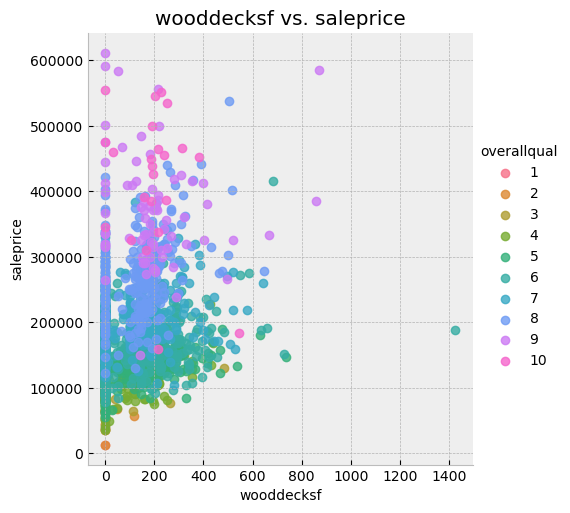

In [88]:
sns.lmplot(x='wooddecksf',y='saleprice',data=train_num,hue='overallqual',fit_reg=False)
plt.title('wooddecksf vs. saleprice');
print('correlation:')
print(train['wooddecksf'].corr(train['saleprice']))

correlation:
0.04762958292314046


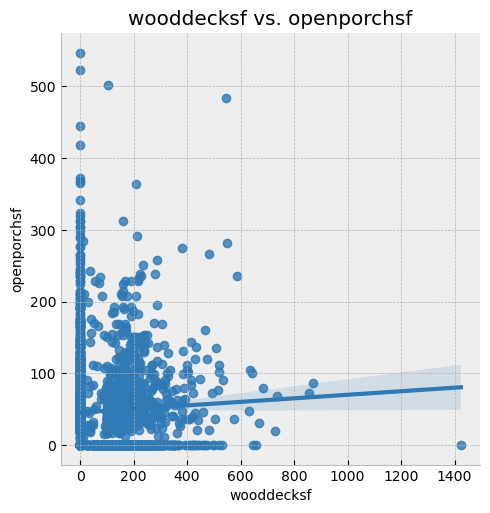

In [89]:
sns.lmplot(x='wooddecksf',y='openporchsf',data=train_num)
plt.title('wooddecksf vs. openporchsf');
print('correlation:')
print(train['wooddecksf'].corr(train['openporchsf']))

**Observation**
1. No conclusion to deduce if wooddecksf is wrongly imputed. 
2. Initial suspicion that wooddecksf is correlated with openporchsf is wrong. (Weak correlation of 0.05)
3. Sales price range of the anomaly data corresponds with the expected level of salesprice drawn by its 'overallqual' level.
4. Will not be dropping data.

**Time Series Analysis**

In [90]:
train['yrsold'].describe()

count    2051.000000
mean     2007.775719
std         1.312014
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yrsold, dtype: float64

Year sold data shows that house transaction data were collected over a four year period from 2006 to 2010. This crosses with our common undestanding of the 2008 Global Financial Crisis that has hit the housing market really hard for the United States. House prices have fallen severely from 2009 onwards due to mass defaults on mortgages, which may have affected the effectiveness of our data. 

Let us dive into the data to see if Ames,Iowa housing area has been hit by this as well.

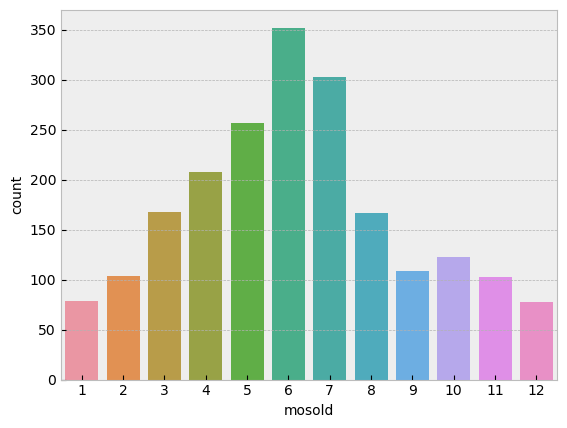

In [91]:
sns.countplot(x='mosold',data=train);

[(0.0, 430000.0)]

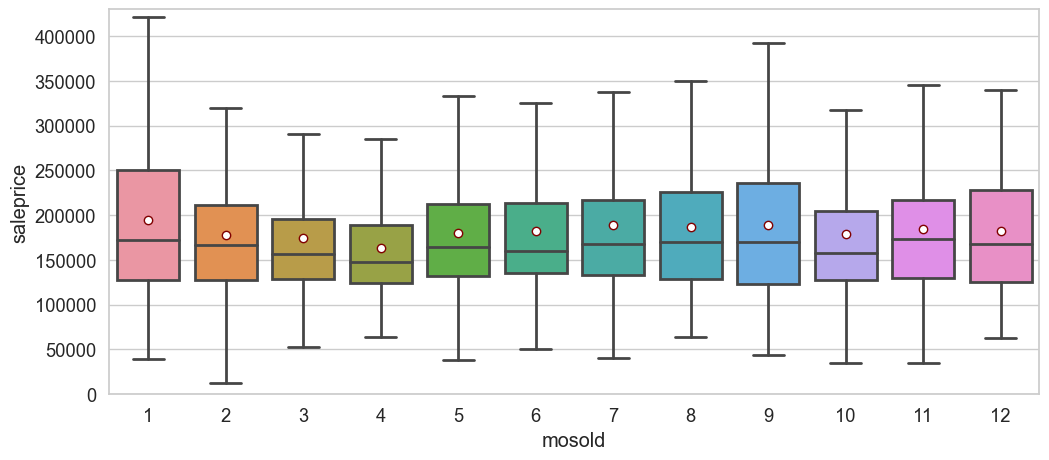

In [92]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})
ax = sns.boxplot(x='mosold',y='saleprice',data=train,fliersize=0,showmeans=True,
                 meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"maroon"})
ax.set(ylim=(0, 430000))

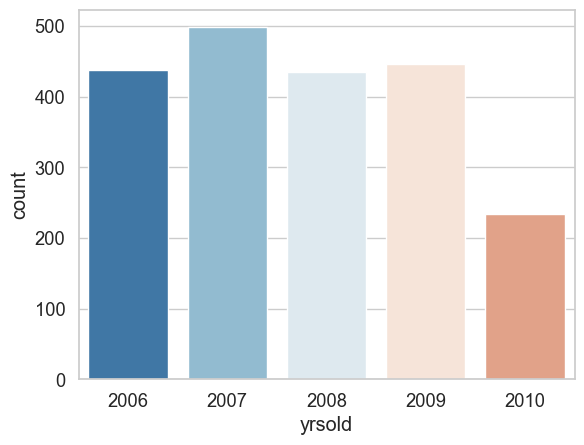

In [93]:
sns.countplot(x='yrsold',data=train);

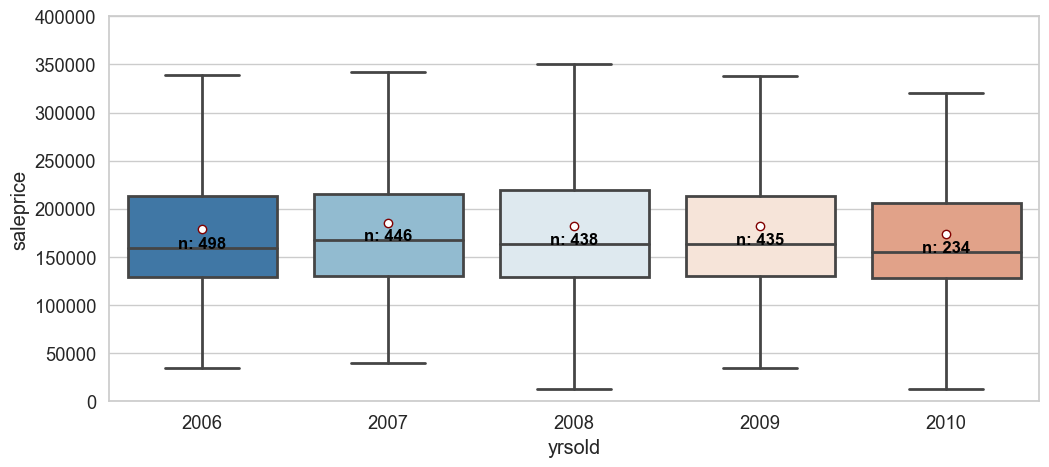

In [94]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})
ax=sns.boxplot(x='yrsold',y='saleprice',data=train,fliersize=0,showmeans=True,
                 meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"maroon"})
ax.set(ylim=(0, 400000))
nobs = train['yrsold'].value_counts().values
nobs = [str(y) for y in nobs.tolist()]
nobs = ["n: " + j for j in nobs]   
pos = range(len(nobs))
medians = train.groupby(['yrsold'])['saleprice'].median().values
for tick,label in zip(pos,ax.get_xticklabels()):                                   
    ax.text(pos[tick], medians[tick] + 1, nobs[tick],
    horizontalalignment='center', size='small', color='k', weight='semibold');

In [95]:
train['yrsold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yrsold, dtype: int64

In [96]:
train[train['yrsold']==2010].groupby(by='mosold').count()

id  pid  mssubclass  mszoning  lotfrontage  lotarea  street  alley  \
mosold                                                                       
1       16   16          16        16           15       16      16     16   
2       21   21          21        21           19       21      21     21   
3       35   35          35        35           30       35      35     35   
4       52   52          52        52           47       52      52     52   
5       53   53          53        53           41       53      53     53   
6       53   53          53        53           45       53      53     53   
7        4    4           4         4            4        4       4      4   

        lotshape  landcontour  ...  3ssnporch  screenporch  poolarea  poolqc  \
mosold                         ...                                             
1             16           16  ...         16           16        16       0   
2             21           21  ...         21           21        21       0   
3             35           35  ...         35           35        35       0   
4             52           52  ...         52           52        52       0   
5             53           53  ...         53           53        53       0   
6             53           53  ...         53           53        53       0   
7              4            4  ...          4            4         4       0   

        fence  miscfeature  miscval  yrsold  saletype  saleprice  
mosold                                                            
1           2           16       16      16        16         16  
2           8           21       21      21        21         21  
3          10           35       35      35        35         35  
4           8           52       52      52        52         52  
5          16           53       53      53        53         53  
6           9           53       53      53        53         53  
7           1            4        4       4         4          4  

[7 rows x 80 columns]

**Observations**
- There appear to be seasonal factors in house sales. 
    - June and July appears to be the time of the year where people sell houses.
    - We observe that the sales volumne throughout the year peaks in Summer and subsequently drops towards the end of the year, whilst picking up again towards the start of the year.
        - A possible reason is due to taxation reasons. 
        - Another reason could be due to Summer. 
            - Summer is a season where people move houses, conduct renovations, take a break from work etc. [Source](https://www.yellowpages.ca/tips/why-summer-is-the-best-season-to-sell-your-home/)
- Generally, April seems to have the lowest mean saleprice, and January has the highest interquartile range of saleprice with highest median.         
- Year 2010 brought about a much lower house sales activities (perhaps due to 2008 financial crisis), as seen by the number of houses sold that year (almost half the number of house sales compared to all other years!). 
    - Mean and median house prices have also decreased during 2010 as compared to other years. 
    - Data collected ended in the month of July 2010. Hence, no results are obtained post-July 2010. This could explain the lower number of houses sold. 

**Insights**
- For house flipping investors, it is recommended to sell the house by Summer as house sale activities peak during that season.
- Investors (both short/long term) can start shopping for houses post-Summer (as sales activities decline) and preferably lock down purchases in April before the peak season (June).
    - This is to capture the lowest price possible when purchasing the house. 

**Data Cleaning**: I will still be removing these two columns, and combining them to a 'houseage' and 'yearsafterremod' columns by doing manual mathematical manipulations. Mosold and Yrsold data do not exhibit disproportionally huge difference in saleprice, hence keeping them in the regression model may not be helpful. 

# 1B Data Cleaning

In [97]:
train_cleaned= train.copy()
train_cleaned.drop(columns=['pid'],inplace=True)
train_cleaned.head()

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0  109          60       RL          NaN    13517   Pave   nil      IR1   
1  544          60       RL         43.0    11492   Pave   nil      IR1   
2  153          20       RL         68.0     7922   Pave   nil      Reg   
3  318          60       RL         73.0     9802   Pave   nil      Reg   
4  255          50       RL         82.0    14235   Pave   nil      IR1   

  landcontour utilities  ... screenporch poolarea poolqc fence miscfeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         nil   
1         Lvl    AllPub  ...           0        0    NaN   NaN         nil   
2         Lvl    AllPub  ...           0        0    NaN   NaN         nil   
3         Lvl    AllPub  ...           0        0    NaN   NaN         nil   
4         Lvl    AllPub  ...           0        0    NaN   NaN         nil   

  miscval mosold  yrsold  saletype  saleprice  
0       0      3    2010       WD      130500  
1       0      4    2009       WD      220000  
2       0      1    2010       WD      109000  
3       0      4    2010       WD      174000  
4       0      3    2010       WD      138500  

[5 rows x 80 columns]

In [98]:
test_cleaned= test.copy()
test_cleaned.drop(columns=['pid'],inplace=True)
test_cleaned.head()

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0  2658         190       RM         69.0     9142   Pave  Grvl      Reg   
1  2718          90       RL          NaN     9662   Pave   NaN      IR1   
2  2414          60       RL         58.0    17104   Pave   NaN      IR1   
3  1989          30       RM         60.0     8520   Pave   NaN      Reg   
4   625          20       RL          NaN     9500   Pave   NaN      IR1   

  landcontour utilities  ... 3ssnporch screenporch poolarea poolqc fence  \
0         Lvl    AllPub  ...         0           0        0    NaN   NaN   
1         Lvl    AllPub  ...         0           0        0    NaN   NaN   
2         Lvl    AllPub  ...         0           0        0    NaN   NaN   
3         Lvl    AllPub  ...         0           0        0    NaN   NaN   
4         Lvl    AllPub  ...         0         185        0    NaN   NaN   

  miscfeature miscval  mosold  yrsold  saletype  
0         NaN       0       4    2006       WD   
1         NaN       0       8    2006       WD   
2         NaN       0       9    2006       New  
3         NaN       0       7    2007       WD   
4         NaN       0       7    2009       WD   

[5 rows x 79 columns]

### Filling missing/wrong values

In [99]:
print(train_cleaned['bsmtfintype2'].isnull().sum())
print(train_cleaned['bsmtexposure'].isnull().sum())

56
58


In [100]:
train_cleaned['bsmtfintype2'].mode()

0    Unf
Name: bsmtfintype2, dtype: object

In [101]:
#To fill bsmthalfbath and bsmtfullbath to be 0.0 (#get back)
train_cleaned[train_cleaned['bsmthalfbath'].isnull()].filter(like='bsmt')

bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  \
616       NaN      NaN          NaN          NaN         0.0          NaN   
1327      NaN      NaN          NaN          NaN         NaN          NaN   

      bsmtfinsf2  bsmtunfsf  totalbsmtsf  bsmtfullbath  bsmthalfbath  
616          0.0        0.0          0.0           NaN           NaN  
1327         NaN        NaN          NaN           NaN           NaN

In [102]:
train_cleaned['bsmthalfbath'].fillna(0,inplace=True)
train_cleaned['bsmtfullbath'].fillna(0,inplace=True)

In [103]:
#To fill bsmtunfsf,bsmtunfsf2,totlabsmtsf, bsmtfinsf1 for #1327 with 0.0.  (#get back)
cols_bsmt = ['bsmtfinsf1','bsmtfinsf2','bsmtunfsf','totalbsmtsf']
train_cleaned[cols_bsmt].isnull().sum()

bsmtfinsf1     1
bsmtfinsf2     1
bsmtunfsf      1
totalbsmtsf    1
dtype: int64

In [104]:
train_cleaned['bsmtfinsf1'].fillna(0,inplace=True)
train_cleaned['bsmtfinsf2'].fillna(0,inplace=True)
train_cleaned['bsmtunfsf'].fillna(0,inplace=True)
train_cleaned['totalbsmtsf'].fillna(0,inplace=True)

test_cleaned['bsmtfinsf1'].fillna(0,inplace=True)
test_cleaned['bsmtfinsf2'].fillna(0,inplace=True)
test_cleaned['bsmtunfsf'].fillna(0,inplace=True)
test_cleaned['totalbsmtsf'].fillna(0,inplace=True)

In [105]:
train_cleaned[cols_bsmt].isnull().sum()

bsmtfinsf1     0
bsmtfinsf2     0
bsmtunfsf      0
totalbsmtsf    0
dtype: int64

In [106]:
# To fill missing "bsmtfintype2" value for index 1147 with mode.
train_cleaned.at[1147, 'bsmtfintype2'] = "Unf"
print(train_cleaned.at[1147, 'bsmtfintype2'])

Unf


In [107]:
# To fill missing "bsmtexposure" values for the 3 index with "No".
train_cleaned.at[1456, 'bsmtexposure'] = "No"
train_cleaned.at[1547, 'bsmtexposure'] = "No"
train_cleaned.at[1997, 'bsmtexposure'] = "No"

In [108]:
train_cleaned[train_cleaned['bsmtexposure']=='No'].filter(like = 'bsmt')

bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  \
0          TA       TA           No          GLQ       533.0          Unf   
1          Gd       TA           No          GLQ       637.0          Unf   
2          TA       TA           No          GLQ       731.0          Unf   
3          Gd       TA           No          Unf         0.0          Unf   
4          Fa       Gd           No          Unf         0.0          Unf   
...       ...      ...          ...          ...         ...          ...   
2044       Gd       TA           No          GLQ       362.0          Unf   
2047       TA       TA           No          BLQ       262.0          Unf   
2048       TA       TA           No          Unf         0.0          Unf   
2049       TA       TA           No          Rec       155.0          LwQ   
2050       TA       TA           No          Unf         0.0          Unf   

      bsmtfinsf2  bsmtunfsf  totalbsmtsf  bsmtfullbath  bsmthalfbath  
0            0.0      192.0        725.0           0.0           0.0  
1            0.0      276.0        913.0           1.0           0.0  
2            0.0      326.0       1057.0           1.0           0.0  
3            0.0      384.0        384.0           0.0           0.0  
4            0.0      676.0        676.0           0.0           0.0  
...          ...        ...          ...           ...           ...  
2044         0.0      392.0        754.0           0.0           0.0  
2047         0.0      599.0        861.0           0.0           0.0  
2048         0.0      896.0        896.0           0.0           0.0  
2049       750.0      295.0       1200.0           1.0           0.0  
2050         0.0      994.0        994.0           0.0           0.0  

[1342 rows x 11 columns]

In [109]:
print(train_cleaned['bsmtfintype2'].isnull().sum())
print(train_cleaned['bsmtexposure'].isnull().sum())

55
55


In [110]:
#To fill missing "masvnrarea" values with 0.
train_cleaned['masvnrarea'].fillna(0,inplace=True)
train_cleaned['masvnrarea'].isnull().sum()

0

In [111]:
test_cleaned['masvnrarea'].fillna(0,inplace=True)
test_cleaned['masvnrarea'].isnull().sum()

0

In [112]:
#To fill missing "masvnrtype" values with None.
train_cleaned['masvnrtype'].fillna("None",inplace=True)
train_cleaned['masvnrtype'].isnull().sum()

0

In [113]:
test_cleaned['masvnrtype'].fillna("None",inplace=True)
test_cleaned['masvnrtype'].isnull().sum()

0

In [114]:
#Change "masvnrtype"=None masvnrarea to be 0.
train_cleaned[train_cleaned['masvnrarea']==1].filter(like='masvnr')

masvnrtype  masvnrarea
765        None         1.0
1148       None         1.0
1684       None         1.0

In [115]:
train_cleaned['masvnrarea'] =train_cleaned['masvnrarea'].apply(lambda x: 0 if x == 1 else x)
train_cleaned['masvnrarea'].nunique()

372

In [116]:
#For area = 0, BrkFace to fill with 254.63015873015874 (#669,#1136)
      #- train[train['masvnrtype']=="BrkFace"].mean()['masvnrarea']
train[(train['masvnrtype']!= "None") & (train['masvnrarea'] == 0)].filter(like='mas')

masvnrtype  masvnrarea
669     BrkFace         0.0
1136    BrkFace         0.0
1187      Stone         0.0

In [117]:
train[train['masvnrtype']=="BrkFace"].mean()['masvnrarea']

254.63015873015874

In [118]:
train['masvnrarea'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: masvnrarea, dtype: float64

In [119]:
BrkFaceVal = train[train['masvnrtype']=="BrkFace"].mean()['masvnrarea']
StoneVal = train[train['masvnrtype']=="Stone"].mean()['masvnrarea']
train_cleaned.iloc[669, train_cleaned.columns.get_loc('masvnrarea')] = int(BrkFaceVal)
train_cleaned.iloc[1136,train_cleaned.columns.get_loc('masvnrarea')] = int(BrkFaceVal)
train_cleaned.iloc[1187, train_cleaned.columns.get_loc('masvnrarea')] = int(StoneVal)

In [120]:
#- For type = None, #810, #1832 will be filled with mode: "BrkFace"

In [121]:
train_cleaned[(train_cleaned['masvnrtype']== "None") & (train_cleaned['masvnrarea'] != 0)].filter(like='mas')

masvnrtype  masvnrarea
810        None       288.0
1832       None       344.0

In [122]:
train_cleaned.iloc[810, train_cleaned.columns.get_loc('masvnrtype')] =  'BrkFace'
train_cleaned.iloc[1832, train_cleaned.columns.get_loc('masvnrtype')] = 'BrkFace'

In [123]:
# To fill garagecar and garagearea of #1712 with mean of "Detached" garage type.
    # train[train['garagetype']=="Detchd"].mean()['garagearea']
    # train[train['garagetype']=="Detchd"].mean()['garagecars']
train_cleaned.iloc[1712, train_cleaned.columns.get_loc('garagecars')] = train[train['garagetype']=="Detchd"].mean()['garagecars']
train_cleaned.iloc[1712, train_cleaned.columns.get_loc('garagearea')] = train[train['garagetype']=="Detchd"].mean()['garagearea']
train_cleaned.iloc[1712,:].filter(like="garage")

garagetype          Detchd
garageyrblt            NaN
garagefinish           NaN
garagecars        1.558879
garagearea      419.543925
garagequal             NaN
garagecond             NaN
Name: 1712, dtype: object

In [124]:
# Dropping the two anomalies from lotarea.
train_cleaned_null = train_cleaned.isnull().sum().sort_values(ascending=False)
train_cleaned_null[train_cleaned_null>0]

poolqc          2042
fence           1651
fireplacequ     1000
lotfrontage      330
garageyrblt      114
garagequal       114
garagecond       114
garagefinish     114
garagetype       113
bsmtqual          55
bsmtfintype2      55
bsmtfintype1      55
bsmtexposure      55
bsmtcond          55
dtype: int64

In [125]:
train_cleaned=train_cleaned[train_cleaned['lotarea']<75000]

In [126]:
train_cleaned[train_cleaned['lotarea']>75000].shape

(0, 80)

In [127]:
train_cleaned[train_cleaned['lotarea'].isnull()].shape

(0, 80)

In [128]:
# Drop the 2 anomalies (#1885,#960) entirely due to conclusions made on "totalbsmtsf"
print(train_cleaned.shape)
train_cleaned=train_cleaned[train_cleaned['totalbsmtsf']<4000]
print(train_cleaned.shape)

(2049, 80)
(2047, 80)


### Updating Data Types

In [129]:
train_obj.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype'],
      dtype='object')

In [130]:
train_obj.shape

(2051, 42)

##### Ordinal Datatypes

In [131]:
# These are the columns that have standardised order. 
train_ordinal = ['exterqual','extercond', 'bsmtqual','bsmtcond',
                 'heatingqc','kitchenqual','fireplacequ','garagequal',
                 'garagecond','poolqc']
ordinal_dict = { np.nan: 0,'Po':1,'Fa':2,"TA":3,"Gd":4,'Ex':5}

In [132]:
def mapping_ordinal(df,col):
    print(df[col].value_counts())
    print('\n')
    df[col] = df[col].replace(ordinal_dict)
    print(df[col].value_counts())
    print('****************************************')
    return df.head()

In [133]:
print("Mapping Begins:")
print('\n')
mapping_ordinal(train_cleaned, 'exterqual')
mapping_ordinal(train_cleaned, 'extercond')
mapping_ordinal(train_cleaned, 'bsmtqual')
mapping_ordinal(train_cleaned, 'bsmtcond')
mapping_ordinal(train_cleaned, 'heatingqc')
mapping_ordinal(train_cleaned, 'kitchenqual')
mapping_ordinal(train_cleaned, 'fireplacequ')
mapping_ordinal(train_cleaned, 'garagequal')
mapping_ordinal(train_cleaned, 'garagecond')
mapping_ordinal(train_cleaned, 'poolqc')

Mapping Begins:


TA    1246
Gd     696
Ex      79
Fa      26
Name: exterqual, dtype: int64


3    1246
4     696
5      79
2      26
Name: exterqual, dtype: int64
****************************************
TA    1774
Gd     215
Fa      49
Ex       7
Po       2
Name: extercond, dtype: int64


3    1774
4     215
2      49
5       7
1       2
Name: extercond, dtype: int64
****************************************
TA    887
Gd    862
Ex    182
Fa     60
Po      1
Name: bsmtqual, dtype: int64


3    887
4    862
5    182
2     60
0     55
1      1
Name: bsmtqual, dtype: int64
****************************************
TA    1830
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmtcond, dtype: int64


3    1830
4      89
2      65
0      55
1       5
5       3
Name: bsmtcond, dtype: int64
****************************************
Ex    1063
TA     596
Gd     318
Fa      67
Po       3
Name: heatingqc, dtype: int64


5    1063
3     596
4     318
2      67
1       3
Name: heatingqc, dtype: int64

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0  109          60       RL          NaN    13517   Pave   nil      IR1   
1  544          60       RL         43.0    11492   Pave   nil      IR1   
2  153          20       RL         68.0     7922   Pave   nil      Reg   
3  318          60       RL         73.0     9802   Pave   nil      Reg   
4  255          50       RL         82.0    14235   Pave   nil      IR1   

  landcontour utilities  ... screenporch poolarea poolqc fence miscfeature  \
0         Lvl    AllPub  ...           0        0      0   NaN         nil   
1         Lvl    AllPub  ...           0        0      0   NaN         nil   
2         Lvl    AllPub  ...           0        0      0   NaN         nil   
3         Lvl    AllPub  ...           0        0      0   NaN         nil   
4         Lvl    AllPub  ...           0        0      0   NaN         nil   

  miscval mosold  yrsold  saletype  saleprice  
0       0      3    2010       WD      130500  
1       0      4    2009       WD      220000  
2       0      1    2010       WD      109000  
3       0      4    2010       WD      174000  
4       0      3    2010       WD      138500  

[5 rows x 80 columns]

In [134]:
mapping_ordinal(test_cleaned, 'exterqual')
mapping_ordinal(test_cleaned, 'extercond')
mapping_ordinal(test_cleaned, 'bsmtqual')
mapping_ordinal(test_cleaned, 'bsmtcond')
mapping_ordinal(test_cleaned, 'heatingqc')
mapping_ordinal(test_cleaned, 'kitchenqual')
mapping_ordinal(test_cleaned, 'fireplacequ')
mapping_ordinal(test_cleaned, 'garagequal')
mapping_ordinal(test_cleaned, 'garagecond')
mapping_ordinal(test_cleaned, 'poolqc')

TA    552
Gd    292
Ex     26
Fa      9
Name: exterqual, dtype: int64


3    552
4    292
5     26
2      9
Name: exterqual, dtype: int64
****************************************
TA    771
Gd     84
Fa     18
Ex      5
Po      1
Name: extercond, dtype: int64


3    771
4     84
2     18
5      5
1      1
Name: extercond, dtype: int64
****************************************
TA    396
Gd    355
Ex     74
Fa     28
Po      1
Name: bsmtqual, dtype: int64


3    396
4    355
5     74
2     28
0     25
1      1
Name: bsmtqual, dtype: int64
****************************************
TA    782
Fa     39
Gd     33
Name: bsmtcond, dtype: int64


3    782
2     39
4     33
0     25
Name: bsmtcond, dtype: int64
****************************************
Ex    430
TA    267
Gd    157
Fa     25
Name: heatingqc, dtype: int64


5    430
3    267
4    157
2     25
Name: heatingqc, dtype: int64
****************************************
TA    447
Gd    354
Ex     54
Fa     23
Po      1
Name: kitchenqual, dty

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0  2658         190       RM         69.0     9142   Pave  Grvl      Reg   
1  2718          90       RL          NaN     9662   Pave   NaN      IR1   
2  2414          60       RL         58.0    17104   Pave   NaN      IR1   
3  1989          30       RM         60.0     8520   Pave   NaN      Reg   
4   625          20       RL          NaN     9500   Pave   NaN      IR1   

  landcontour utilities  ... 3ssnporch screenporch poolarea poolqc fence  \
0         Lvl    AllPub  ...         0           0        0      0   NaN   
1         Lvl    AllPub  ...         0           0        0      0   NaN   
2         Lvl    AllPub  ...         0           0        0      0   NaN   
3         Lvl    AllPub  ...         0           0        0      0   NaN   
4         Lvl    AllPub  ...         0         185        0      0   NaN   

  miscfeature miscval  mosold  yrsold  saletype  
0         NaN       0       4    2006       WD   
1         NaN       0       8    2006       WD   
2         NaN       0       9    2006       New  
3         NaN       0       7    2007       WD   
4         NaN       0       7    2009       WD   

[5 rows x 79 columns]

In [135]:
print(f"Number of standardised ordinal columns (cleaned): {len(train_ordinal)}")

Number of standardised ordinal columns (cleaned): 10


In [136]:
# These are the columns with NO standardised orders. 
# Hence we need to map them individually. 

train_ordinal_2 = ['bsmtexposure','bsmtfintype1',
                   'bsmtfintype2','garagefinish','fence',
                  'landslope','lotshape'] 
#Dictionaries:
#***************************************************************************************#
bsmt_dict = {"Gd":4,"Av":3,"Mn":2,"No":1,np.nan:0}
bsmtfin_dict = {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,np.nan:0}
garagefin_dict = {"Fin":3,"RFn":2,"Unf":1,np.nan:0}
fence_dict = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1,np.nan:0}
LS_dict = {"Sev":3,"Mod":2,"Gtl":1,np.nan:0}
lots_dict = {"Reg":4,"IR1":3,"IR2":2,"IR3":1,np.nan:0}
# ***************************************************************************************#

#1
print(train_cleaned['bsmtexposure'].value_counts())
print('\n')
train_cleaned['bsmtexposure'] = train_cleaned['bsmtexposure'].replace(bsmt_dict) 
test_cleaned['bsmtexposure'] = test_cleaned['bsmtexposure'].replace(bsmt_dict) 
print(train_cleaned['bsmtexposure'].value_counts())
print('****************************************')

#2
print(train_cleaned['bsmtfintype1'].value_counts())
print('\n')
train_cleaned['bsmtfintype1'] = train_cleaned['bsmtfintype1'].replace(bsmtfin_dict) #2
test_cleaned['bsmtfintype1'] = test_cleaned['bsmtfintype1'].replace(bsmtfin_dict) #2
print(train_cleaned['bsmtfintype1'].value_counts())
print('****************************************')

#3
print(train_cleaned['bsmtfintype2'].value_counts())
print('\n')
train_cleaned['bsmtfintype2'] = train_cleaned['bsmtfintype2'].replace(bsmtfin_dict) #3
test_cleaned['bsmtfintype2'] = test_cleaned['bsmtfintype2'].replace(bsmtfin_dict) #3
print(train_cleaned['bsmtfintype2'].value_counts())
print('****************************************')

#4
print(train_cleaned['garagefinish'].value_counts())
print('\n')
train_cleaned['garagefinish'] = train_cleaned['garagefinish'].replace(garagefin_dict) #4
test_cleaned['garagefinish'] = test_cleaned['garagefinish'].replace(garagefin_dict) #4
print(train_cleaned['garagefinish'].value_counts())
print('****************************************')

#5
print(train_cleaned['fence'].value_counts())
print('\n')
train_cleaned['fence'] = train_cleaned['fence'].replace(fence_dict) #5
test_cleaned['fence'] = test_cleaned['fence'].replace(fence_dict) #5
print(train_cleaned['fence'].value_counts())
print('****************************************')

#6
print(train_cleaned['landslope'].value_counts())
print('\n')
train_cleaned['landslope'] = train_cleaned['landslope'].replace(LS_dict) #6
test_cleaned['landslope'] = test_cleaned['landslope'].replace(LS_dict) #6
print(train_cleaned['landslope'].value_counts())
print('****************************************')

#7
print(train_cleaned['lotshape'].value_counts())
print('\n')
train_cleaned['lotshape'] = train_cleaned['lotshape'].replace(lots_dict) #6
test_cleaned['lotshape'] = test_cleaned['lotshape'].replace(lots_dict) #6
print(train_cleaned['lotshape'].value_counts())
print('****************************************')

No    1342
Av     288
Gd     199
Mn     163
Name: bsmtexposure, dtype: int64


1.0    1342
3.0     288
4.0     199
2.0     163
0.0      55
Name: bsmtexposure, dtype: int64
****************************************
GLQ    612
Unf    603
ALQ    293
BLQ    200
Rec    182
LwQ    102
Name: bsmtfintype1, dtype: int64


6.0    612
1.0    603
5.0    293
4.0    200
3.0    182
2.0    102
0.0     55
Name: bsmtfintype1, dtype: int64
****************************************
Unf    1746
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfintype2, dtype: int64


1.0    1746
3.0      80
2.0      60
0.0      55
4.0      48
5.0      35
6.0      23
Name: bsmtfintype2, dtype: int64
****************************************
Unf    848
RFn    579
Fin    506
Name: garagefinish, dtype: int64


1.0    848
2.0    579
3.0    506
0.0    114
Name: garagefinish, dtype: int64
****************************************
MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64


0.0 

In [137]:
# These are the categorical data that were already classified as integers and nicely mapped to ordinal sequence. 
train_ordinal_3 = ['overallqual','overallcond']

In [138]:
print(f"Number of unstandardised ordinal columns (cleaned): {len(train_ordinal_2)}")

Number of unstandardised ordinal columns (cleaned): 7


In [139]:
# To map garagetype 'null' to be 0. 
train_cleaned[train_cleaned['garagetype']=="NA"]

Empty DataFrame
Columns: [id, mssubclass, mszoning, lotfrontage, lotarea, street, alley, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremod/add, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, fireplacequ, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, poolqc, fence, miscfeature, miscval, mosold, yrsold, saletype, saleprice]
Index: []

[0 rows x 80 columns]

In [140]:
train_cleaned['garagetype'] = train_cleaned['garagetype'].apply(lambda x: "NA" if pd.isnull(x) else x)

In [141]:
test_cleaned['garagetype'] = test_cleaned['garagetype'].apply(lambda x: "NA" if pd.isnull(x) else x)

In [142]:
train_cleaned['garagetype'].value_counts()

Attchd     1209
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garagetype, dtype: int64

##### Changing datatypes

In [143]:
train_cleaned['mssubclass'] = train_cleaned['mssubclass'].astype(str)

In [144]:
test_cleaned['mssubclass'] = test_cleaned['mssubclass'].astype(str)

In [145]:
train_cleaned['mssubclass'].dtypes

dtype('O')

##### Boolean Datatypes

In [146]:
# Converting boolean datatypes to numbers.
print(train_cleaned['street'].value_counts())
print('\n')
print(train_cleaned['centralair'].value_counts())

Pave    2040
Grvl       7
Name: street, dtype: int64


Y    1906
N     141
Name: centralair, dtype: int64


In [147]:
train_cleaned['street'].replace({"Pave": 1, "Grvl": 0},inplace=True)
train_cleaned['centralair'].replace({"Y": 1, "N": 0},inplace=True)

test_cleaned['street'].replace({"Pave": 1, "Grvl": 0},inplace=True)
test_cleaned['centralair'].replace({"Y": 1, "N": 0},inplace=True)

print(train_cleaned['street'].value_counts())
print('\n')
print(train_cleaned['centralair'].value_counts())

1    2040
0       7
Name: street, dtype: int64


1    1906
0     141
Name: centralair, dtype: int64


In [148]:
more_col=len(train_cleaned.select_dtypes(object).columns)
print("Number of columns cleaned: 19")
print(f"Number of nominal columns: {more_col}") 
train_cleaned.select_dtypes(object).columns

Number of columns cleaned: 19
Number of nominal columns: 24


Index(['mssubclass', 'mszoning', 'alley', 'landcontour', 'utilities',
       'lotconfig', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'foundation', 'heating', 'electrical', 'functional',
       'garagetype', 'paveddrive', 'miscfeature', 'saletype'],
      dtype='object')

In [149]:
train_cleaned['mosold']

0        3
1        4
2        1
3        4
4        3
        ..
2046     1
2047     3
2048     3
2049    11
2050     6
Name: mosold, Length: 2047, dtype: int64

### Creating New Columns & Removing Unneccessary Columns

In [150]:
train_cleaned.filter(like='bath').columns
bath_cols= list(train_cleaned.filter(like='bath').columns)
bath_cols.append('saleprice')

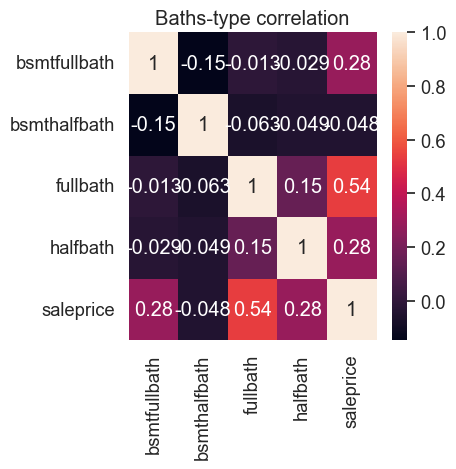

In [151]:
plt.figure(figsize=(4,4))
sns.heatmap(train_cleaned.loc[:,bath_cols].corr(),annot=True).set_title('Baths-type correlation');

In [152]:
# We have decided to combined some columns to make our variable 'continuous' instead of 'discrete'. 
# 1. Creation of "House Age" column with the following formula: (year sold + month sold) - (year built).
# 2. Creation of "Years after Renovation" column with the following formula: (Year sold + Month sold) - (Years remod/add).

# We have decided to categorise these four columns of half-baths and full-baths because individually, they do not seem to be highly correlated with saleprice. 
# We hope to check if combined, will it be highly correlated?
# 3. Creation of "Total Full Baths" and "Total Half Baths" with the following formula:
    #A. Fullbaths: Bsmtfullbath + fullbath
    #B. HalfBaths: Bsmthalfbath + halfbath
# Thereafter, we will delete the unnecessary columns and keep the two newly created columns.
#*************************************************************************************************************************#

# Creating "HouseAge". 
train_cleaned['houseage'] = train_cleaned['yrsold'] +  (train_cleaned['mosold']/12) - train_cleaned['yearbuilt']
test_cleaned['houseage'] = test_cleaned['yrsold'] +  (test_cleaned['mosold']/12) - test_cleaned['yearbuilt']

print(train_cleaned['houseage'].describe())
print('\n')
# Creating "YearsAfterRemod". 
train_cleaned['yearsafterremod'] = train_cleaned['yrsold'] +  (train_cleaned['mosold']/12)  - train_cleaned['yearremod/add']
test_cleaned['yearsafterremod'] = test_cleaned['yrsold'] +  (test_cleaned['mosold']/12)  - test_cleaned['yearremod/add']
print(train_cleaned['yearsafterremod'].describe())

# Creating "totalfullbaths" & "totalhalfbaths".
train_cleaned['totalfullbaths'] = train_cleaned['bsmtfullbath'] +  (train_cleaned['fullbath']) 
train_cleaned['totalhalfbaths'] = train_cleaned['bsmthalfbath'] +  (train_cleaned['halfbath']) 

test_cleaned['totalfullbaths'] = test_cleaned['bsmtfullbath'] +  (test_cleaned['fullbath']) 
test_cleaned['totalhalfbaths'] = test_cleaned['bsmthalfbath'] +  (test_cleaned['halfbath']) 

print('\n')
print(train_cleaned['totalfullbaths'].describe())
print('\n')
print(train_cleaned['totalhalfbaths'].describe())

count    2047.000000
mean       36.614639
std        30.218546
min         0.333333
25%         7.500000
50%        34.250000
75%        54.916667
max       137.000000
Name: houseage, dtype: float64


count    2047.000000
mean       24.148103
std        21.013968
min        -0.500000
25%         4.750000
50%        15.750000
75%        43.916667
max        60.583333
Name: yearsafterremod, dtype: float64


count    2047.000000
mean        2.002443
std         0.752639
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: totalfullbaths, dtype: float64


count    2047.000000
mean        0.433317
std         0.548992
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: totalhalfbaths, dtype: float64


In [153]:
houseage_remod = ['yrsold','mosold','yearremod/add','yearbuilt','houseage','yearsafterremod']
# train_cleaned.loc[train_cleaned['houseage']<0,houseage_remod]

In [154]:
# There is a house with negative house age. After analysis, this is a result of a new house sales. 
# Hence, we will change the houseage to 0.
# train_cleaned.loc[train_cleaned['houseage']<0, 'houseage'] = 0
# train_cleaned[train_cleaned['houseage']<0].nunique()['houseage']

In [155]:
# There is a house with 'yearsafterremod' that is less than 0. This is impractical. 
# Upon investigation, we suspect that the house is renovated again by the next owner, or it could be a mistake.
# Hence, I will change the value of yearsafterremod to 0. 

train_cleaned.loc[train_cleaned['yearsafterremod']<0,houseage_remod]

yrsold  mosold  yearremod/add  yearbuilt  houseage  yearsafterremod
1719    2007       6           2008       2007       0.5             -0.5

In [156]:
train_cleaned.loc[train_cleaned['yearsafterremod']<0,'yearsafterremod'] = 0
train_cleaned[train_cleaned['yearsafterremod']<0].nunique()['yearsafterremod']

0

In [157]:
# Deleting "yrsold", "mosold", "yearbuilt",'yearremod/add', 'bsmthalfbath','fullbath','halfbath','bsmtfullbath'
train_cleaned.drop(columns = ['yearbuilt','mosold','yrsold','yearremod/add', 
                              'bsmthalfbath','fullbath','halfbath','bsmtfullbath'],inplace=True)

test_cleaned.drop(columns = ['yearbuilt','mosold','yrsold','yearremod/add', 
                              'bsmthalfbath','fullbath','halfbath','bsmtfullbath'],inplace=True)

In [158]:
# Investigating Pool QC and Pool Area:
train_cleaned['poolqc'].value_counts()

0    2039
4       3
2       2
3       2
5       1
Name: poolqc, dtype: int64

In [159]:
train_cleaned['poolarea'].sort_values().value_counts()

0      2039
228       1
368       1
519       1
561       1
576       1
648       1
738       1
800       1
Name: poolarea, dtype: int64

In [160]:
print("Before adding a new variable:")
print(train_cleaned.shape)

Before adding a new variable:
(2047, 76)


In [161]:
# Since there are minimal datapoints on Pool, I will change the variable to a boolean to check if house has a pool.
pool =[]
for i in train_cleaned['poolarea']:
    if i > 0:
        pool.append(1)
    else:
        pool.append(0)

train_cleaned['pool'] = pool
train_cleaned['pool'].value_counts()

0    2039
1       8
Name: pool, dtype: int64

In [162]:
pool =[]
for i in test_cleaned['poolarea']:
    if i > 0:
        pool.append(1)
    else:
        pool.append(0)

test_cleaned['pool'] = pool
test_cleaned['pool'].value_counts()

0    875
1      4
Name: pool, dtype: int64

In [163]:
print("Before dropping the two columns on Pools:")
print(train_cleaned.shape)

Before dropping the two columns on Pools:
(2047, 77)


In [164]:
train_cleaned.drop(columns=['poolarea','poolqc'],inplace=True)
test_cleaned.drop(columns=['poolarea','poolqc'],inplace=True)
print("After dropping columns:")
print(train_cleaned.shape)

After dropping columns:
(2047, 75)


In [165]:
train_ordinal.remove('poolqc')

In [166]:
# Removing alley, miscfeature and lotfrontage (As reasoned above)
train_cleaned.drop(columns=['alley','lotfrontage','miscfeature'],inplace=True)
test_cleaned.drop(columns=['alley','lotfrontage','miscfeature'],inplace=True)

# 2A Correlation: Multi-collinearity

#### Correlation between numerical data

In [167]:
train_cleaned.select_dtypes(np.number).columns

Index(['id', 'lotarea', 'street', 'lotshape', 'landslope', 'overallqual',
       'overallcond', 'masvnrarea', 'exterqual', 'extercond', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heatingqc',
       'centralair', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'fireplaces', 'fireplacequ', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'fence',
       'miscval', 'saleprice', 'houseage', 'yearsafterremod', 'totalfullbaths',
       'totalhalfbaths', 'pool'],
      dtype='object')

In [168]:
# Numbers-type columns: Numerical
num_cols = ['lotarea', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'totalhalfbaths', 'totalfullbaths',
        'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch',
       'miscval', 'saleprice','houseage','yearsafterremod']
train_num_cleaned = train_cleaned[num_cols]      # First introduction of train_num_cleaned

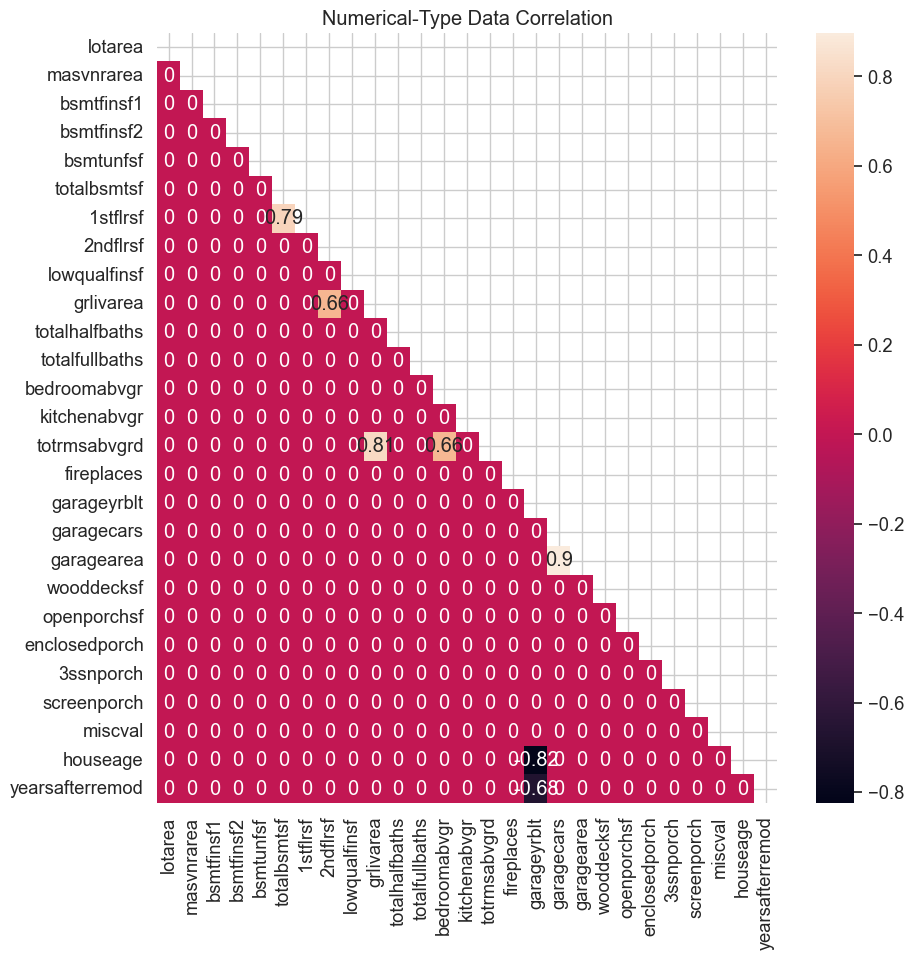

In [169]:
train_num_corr = train_num_cleaned.drop(columns='saleprice').corr()
train_num_corr[(np.abs(train_num_corr)<.65) ] = 0
plt.figure(figsize=(10,10))

custom_mask = np.zeros_like(train_num_corr.corr())   
custom_mask[np.triu_indices_from(custom_mask)] = True  

sns.heatmap(train_num_corr,annot=True,mask=custom_mask).set_title("Numerical-Type Data Correlation");

In [170]:
corr_matrix_num = train_num_cleaned.drop(columns='saleprice').corr().abs()

corr_num = (corr_matrix_num.where(np.triu(np.ones(corr_matrix_num.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
round(corr_num[corr_num>0.65],2)

garagecars    garagearea         0.90
garageyrblt   houseage           0.82
grlivarea     totrmsabvgrd       0.81
totalbsmtsf   1stflrsf           0.79
garageyrblt   yearsafterremod    0.68
bedroomabvgr  totrmsabvgrd       0.66
2ndflrsf      grlivarea          0.66
dtype: float64

#### Correlation between Categorical data

In [171]:
df1=train_cleaned[train_ordinal]
df2=train_cleaned[train_ordinal_2]
df3=train_cleaned[train_ordinal_3]
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2047, 9)
(2047, 7)
(2047, 2)


In [172]:
ordinal_data = df1.join(df2).join(df3)
ordinal_data.shape

(2047, 18)

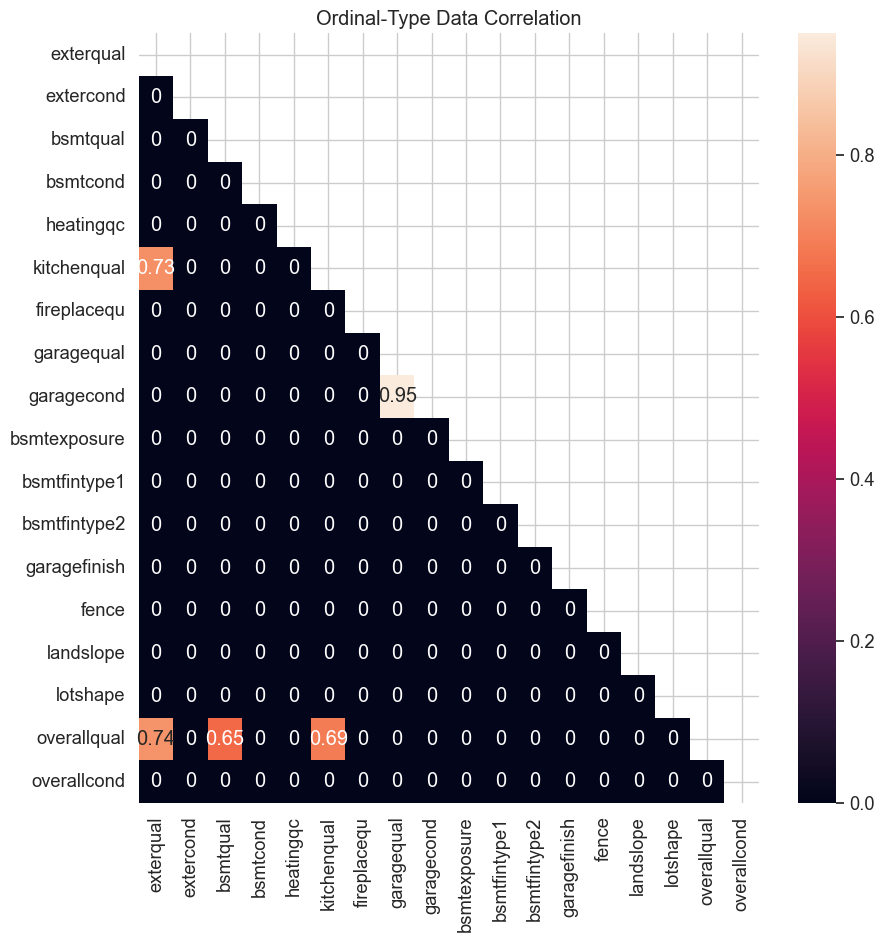

In [173]:
ordinal_data_corr = ordinal_data.corr()
ordinal_data_corr[(np.abs(ordinal_data_corr)<.65)] = 0

plt.figure(figsize=(10,10))
custom_mask = np.zeros_like(ordinal_data.corr())   
custom_mask[np.triu_indices_from(custom_mask)] = True  

sns.heatmap(ordinal_data_corr,annot=True,mask=custom_mask).set_title("Ordinal-Type Data Correlation");

In [174]:
corr_matrix_ordinal = ordinal_data.corr().abs()

corr_ordinal = (corr_matrix_ordinal.where(np.triu(np.ones(corr_matrix_ordinal.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
round(corr_ordinal[corr_ordinal>0.65],2)

garagequal   garagecond     0.95
exterqual    overallqual    0.74
             kitchenqual    0.73
kitchenqual  overallqual    0.69
bsmtqual     overallqual    0.65
dtype: float64

##### Decision to drop data: Numbers and Ordinal-typed data:

In [175]:
corr_col = [
'garagecars','garagearea'  ,      
'yearsafterremod' ,'garageyrblt' , 'houseage',  
'grlivarea' ,'totrmsabvgrd' , 
'totalbsmtsf' , '1stflrsf', 'bedroomabvgr',
'bsmtfinsf1','2ndflrsf','saleprice']
pd.DataFrame(train_cleaned[corr_col]).isnull().sum()

garagecars           0
garagearea           0
yearsafterremod      0
garageyrblt        114
houseage             0
grlivarea            0
totrmsabvgrd         0
totalbsmtsf          0
1stflrsf             0
bedroomabvgr         0
bsmtfinsf1           0
2ndflrsf             0
saleprice            0
dtype: int64

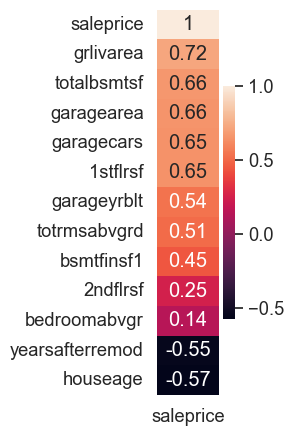

In [176]:
plt.figure(figsize=(1,5))
sns.heatmap(train_cleaned[corr_col].corr()[['saleprice']].sort_values(by='saleprice',ascending=False),annot=True);

- To avoid multi-collinearity, we have to drop columns with high correlation. We have to select one of the two columns as they have similar traits. 
- Decision to drop columns are based on criterion as follows:
    1. Logic - Will it make sense to drop the column based on conventional understanding?
    2. If Null is Present - To choose between the two columns, we will prefer to drop columns with null values.
    3. Prefer float (continuous) variables than integer (discrete) variables
    4. Comparison of correlation with Saleprice. If it is highly correlated, will prefer to keep the column.
- With these considerations, I will be dropping these columns:
    - Numbers-typed data:        
        1. garagecars - As compared to garagearea, it makes more sense to measure in Area (sqft)
        2. totrmsabvgrd - As compared to grlivingarea, it makes more sense to measure in Area (sqft)
        3. totalbsmtsf - Since 1stflrsf has 0 null values.
        4. garageyrblt - This is essentially the same as 'yrbuilt' in most cases, which is nearly perfectly collinear with "houseage"
        3. Since totrmsabvgr is dropped, I will be keeping bedrmsabvgr.
        4. 2ndflrsf (as opposed to grlivarea) as it has much lesser correlation to saleprice than 'grlivarea'.
    - Categorical-typed data: 
        1. We will choose Overall Qual as a indicator for quality, and drop the other "Quality" measures that would feed into "Overall Qual"
            - Drop Exter Qual, Bsmt Qual, Kitchen Qual

In [177]:
# We will drop collinear columns, explained above. 
train_cleaned.drop(columns=['garagecars','totrmsabvgrd','totalbsmtsf','garageyrblt','2ndflrsf','bsmtqual','exterqual','kitchenqual'],inplace=True)
test_cleaned.drop(columns=['garagecars','totrmsabvgrd','totalbsmtsf','garageyrblt','2ndflrsf','bsmtqual','exterqual','kitchenqual'],inplace=True)
train_cleaned.shape

(2047, 64)

In [178]:
# Dropping columns in Numbers-datatype df:
train_num_cleaned.drop(columns=['garagecars','totrmsabvgrd','totalbsmtsf','garageyrblt','2ndflrsf'],inplace=True)
# Dropping columns in Ordinal-datatype df:
ordinal_data.drop(columns=['bsmtqual','exterqual','kitchenqual'],inplace=True)
# Including Saleprice in ordinal-datatype df to measure correlation.
ordinal_data['saleprice'] = train_num_cleaned['saleprice']

##### Classification of Data Types:

In [179]:
train_cleaned.select_dtypes(object).columns

Index(['mssubclass', 'mszoning', 'landcontour', 'utilities', 'lotconfig',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'foundation', 'heating', 'electrical', 'functional', 'garagetype',
       'paveddrive', 'saletype'],
      dtype='object')

In [180]:
nominal_data = ['mssubclass','mszoning', 'landcontour', 'utilities', 'lotconfig',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'foundation', 'heating', 'electrical', 'functional', 'garagetype',
       'paveddrive', 'saletype','pool','centralair','street','saleprice']

In [181]:
nominal_df = train_cleaned[nominal_data] 

In [182]:
nominal_df.shape

(2047, 26)

As seen above, we will classify our overall train_cleaned dataframe into 3 seperate dataframes. 
1. Numerical Dataframe: train_num_cleaned.
    - This will take columns in train_cleaned that are numerical/continuous in nature.
    - This numerical dataframe is suitable for statistical analysis. 
2. Categorical - Ordinal Dataframe: ordinal_data
    - Although data are in numerical format, we seperate them from the above "numerical" dataframe as these data are categorical in nature, but ordinal. 
    - Seperating these from numerical will give us a better understanding of our data when we do statistical analysis
3. Categorical - Nominal Dataframe: nominal_data
    - These are our boolean series, and our other categorical series that may/may not be represented by numerical format.

# 2B Correlation of X Variables against Saleprice

#### Relationship of Numbers/Ordinal-typed data to independent variable

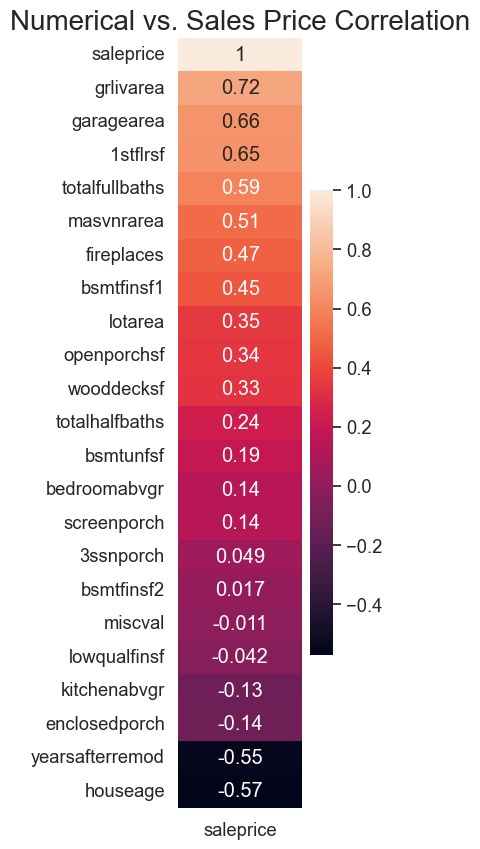

In [183]:
plt.figure(figsize=(2,10))
sns.heatmap(train_num_cleaned.corr()[['saleprice']].sort_values('saleprice',ascending=False),
           annot=True);
plt.title('Numerical vs. Sales Price Correlation',fontdict={'fontsize': 20});

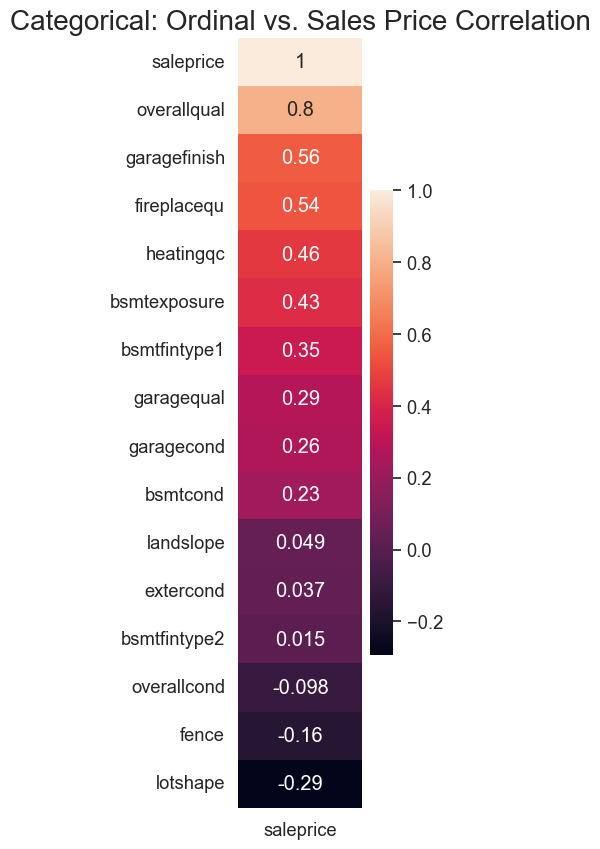

In [184]:
plt.figure(figsize=(2,10))
sns.heatmap(ordinal_data.corr()[['saleprice']].sort_values('saleprice',ascending=False),
           annot=True)
plt.title('Categorical: Ordinal vs. Sales Price Correlation',fontdict={'fontsize': 20});

- Prior to this Correlation exercise, we have already accounted for multi-collinear variables with inter-variable correlation of more than 0.65. 
- Here, we check each variable's correlation with SalePrice to see if the variable is a good potential candidate to be a regressor in our linear regression.
- For Numbers-type df:
    - grlivingarea,garagearea,1stflrsf have correlations with SalePrice of >0.6
- For ordinal-type df: 
    - overallqual has the strongest correlation with SalePrice of 0.8.
    
We will not be dropping any columns at this stage.

#### Relationship of Nominal Data to Dependent Variable

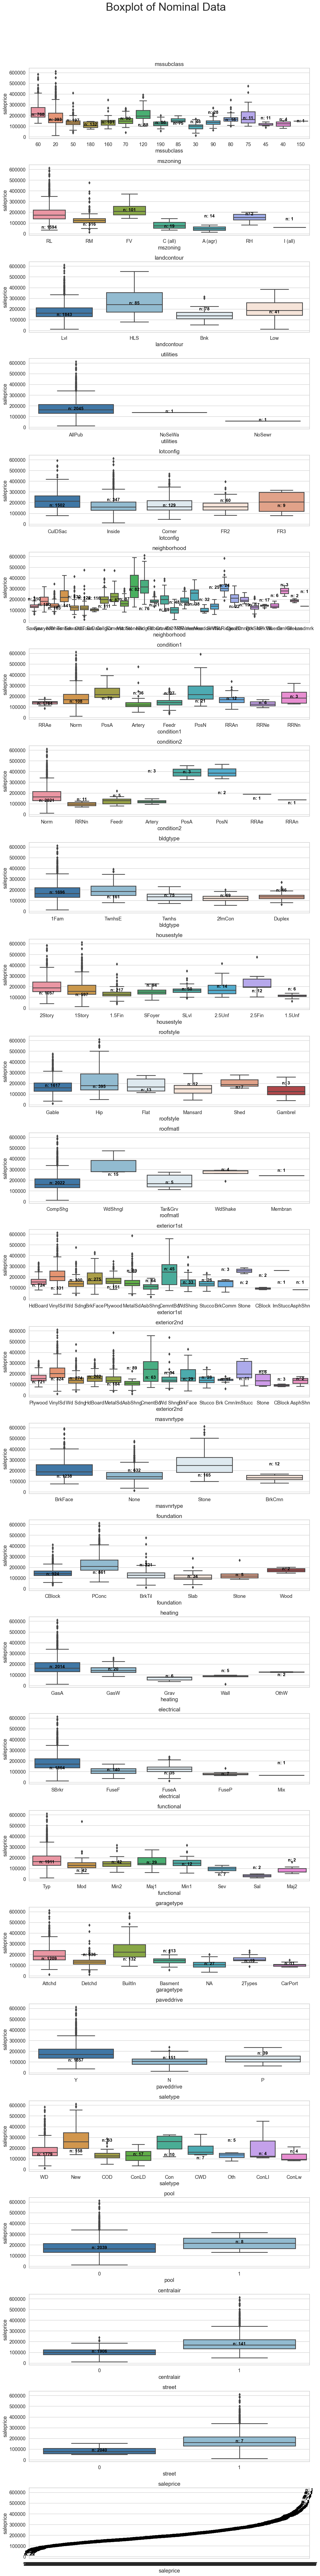

In [185]:
subplot_nom_boxplot(nominal_df,nominal_df.columns,"Boxplot of Nominal Data",nominal_df.columns,(15,100))

**Observations**
1. Utilities data is highly skewed: There are only 1 observation in 2 categories, with the rest in the 3rd category. Hence, we will drop the column.
2. Roofmatl will be dropped as it is highly skewed to one category. 
3. For condition1, PosA and PosN fetches higher sales price. We will convert this into a boolean with true = [posN,posA] and false = Others. 
2. For Condition2, houses with PosA and PosN fetch much higher sales price. However, there are only a few observations in those two categories. For the rest of the categories, the spread of data is very minimal. Hence, we will drop the column.
3. It is difficult to analyse "Exterior1st" and "Exterior2nd" and come up with a conclusion based on the above boxplots, since for the same material, it appears that both Exterior1st and Exterior2nd has similar saleprice ranges. I will do a group plot to analyse further.
4. Heating is highly skewed with majority of houses with GasA heating. We will drop the column. 
5. Electrical is highly skewed to "SBrKr". However, since SBrKr fetches a higher sales price than the other types, we will keep this column and change it to a boolean. 
5. For pool and street: For these two boolean columns, data is highly skewed towards one result with majority of data in that category. However, it seems from the boxplots that the interquartile range (IQR) of values for Pool = 1 and Street = 1 is higher than the IQR for Pool = 0 and Street = 0. Hence, we will still keep these columns and will observe these behaviours at the later stage of our analysis.
6. For salestype, results are also highly skewed. However, we observe that "new" category fetch a much higher premium in saleprice. Hence, I will make it a boolean of 'new' and 'others. 

In [186]:
exterior_df=train[['id','exterior1st','exterior2nd','saleprice']]
exterior_df.head()

id exterior1st exterior2nd  saleprice
0  109     HdBoard     Plywood     130500
1  544     VinylSd     VinylSd     220000
2  153     VinylSd     VinylSd     109000
3  318     VinylSd     VinylSd     174000
4  255     Wd Sdng     Plywood     138500

In [187]:
exterior_melted = exterior_df.melt(id_vars=['id','saleprice'],value_vars=['exterior1st','exterior2nd'],
           value_name='material',var_name='exteriors')
exterior_melted

id  saleprice    exteriors material
0      109     130500  exterior1st  HdBoard
1      544     220000  exterior1st  VinylSd
2      153     109000  exterior1st  VinylSd
3      318     174000  exterior1st  VinylSd
4      255     138500  exterior1st  Wd Sdng
...    ...        ...          ...      ...
4097  1587     298751  exterior2nd  VinylSd
4098   785      82500  exterior2nd  VinylSd
4099   916     177000  exterior2nd    Stone
4100   639     144000  exterior2nd  Plywood
4101    10     189000  exterior2nd  VinylSd

[4102 rows x 4 columns]

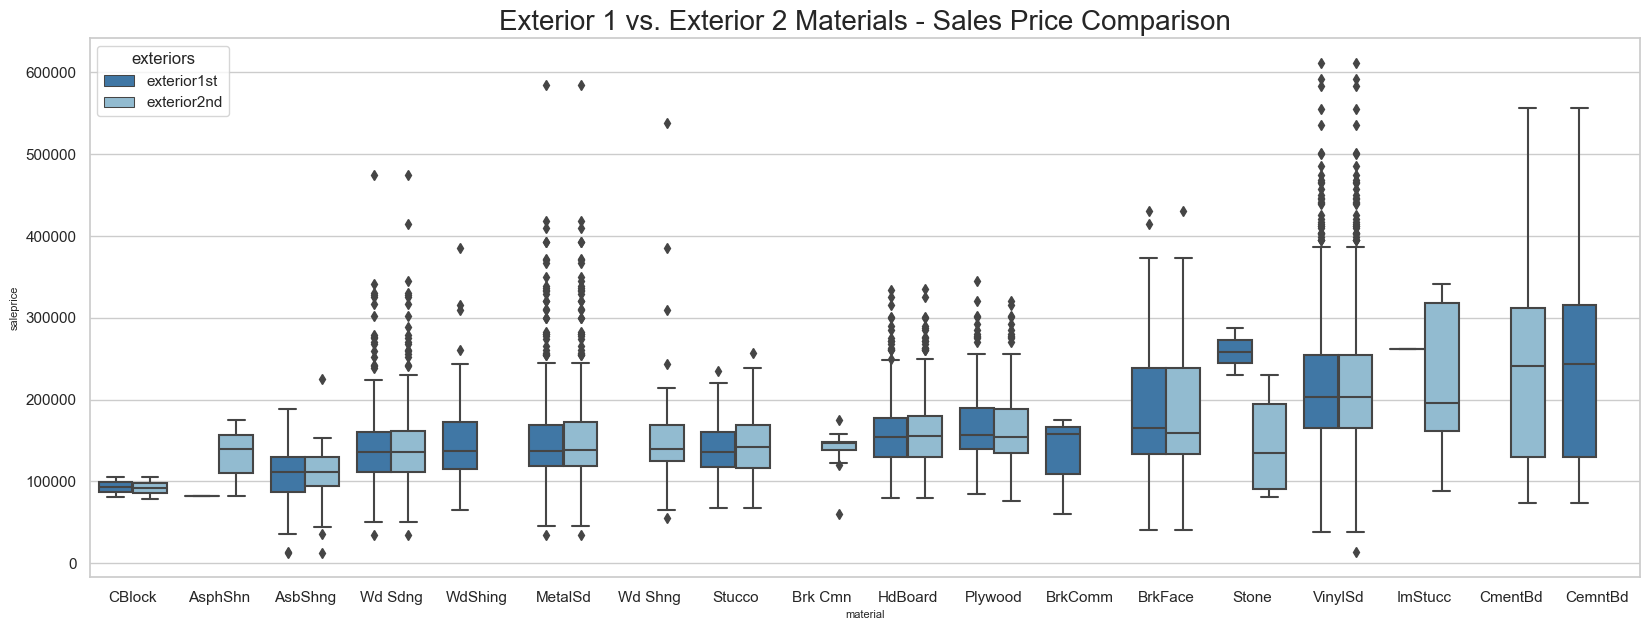

In [188]:
sns.set_context("notebook", rc={"font.size":8,"axes.titlesize":15,"axes.labelsize":7})  
sorted_exteriors = exterior_melted.groupby(['material'])['saleprice'].median().sort_values()
plt.figure(figsize=(20,7))
plt.title('Exterior 1 vs. Exterior 2 Materials - Sales Price Comparison',fontdict={'fontsize': 20});
sns.boxplot(x='material',y='saleprice',hue='exteriors',data=exterior_melted,order=list(sorted_exteriors.index));

In [189]:
ex_equal = train_cleaned[train_cleaned['exterior1st'] == train_cleaned['exterior2nd']][['exterior1st','exterior2nd','saleprice']]
ex_diff = train_cleaned[train_cleaned['exterior1st'] != train_cleaned['exterior2nd']][['exterior1st','exterior2nd','saleprice']]
print(f'Number of houses with same materials for "exterior1st" and "exterior2nd": {ex_equal.shape[0]}')
print(f'Number of houses with different materials for "exterior1st" and "exterior2nd": {ex_diff.shape[0]}')

Number of houses with same materials for "exterior1st" and "exterior2nd": 1731
Number of houses with different materials for "exterior1st" and "exterior2nd": 316


In [190]:
print(ex_equal['saleprice'].mean())
print(ex_diff['saleprice'].mean())

181019.8382437897
183310.6582278481


- Paired boxplot result suggest that Exterior1st and Exterior2nd's interquartile range behaviours for each material type is broadly similar.
- This means that exterior1st is highly positively correlated to exterior2nd, which is not ideal for our regression.
- There are a couple of pairs with missing IQR in one of its columns (either Exterior1st or Exterior2nd).
- The only stark difference in IQR is for Stone material, where exterior1st fetch significantly higher salesprice than exterior2nd. 
- To tackle the collinearity problem, we have to either drop one column or combine them. 
- **Data Cleaning**: Will be dropping exterior1st. Based on boxplot above, exterior1st has more materials that do not have presence as compared to exterior2nd (columns = AsphShn, Brk Cnn, ImStucc). 
    - With more variety of training data across categories, we will train our model to better predict based on unseen test data.

#### Skewed data

In [191]:
ordinal_data.drop(columns='saleprice',inplace=True)

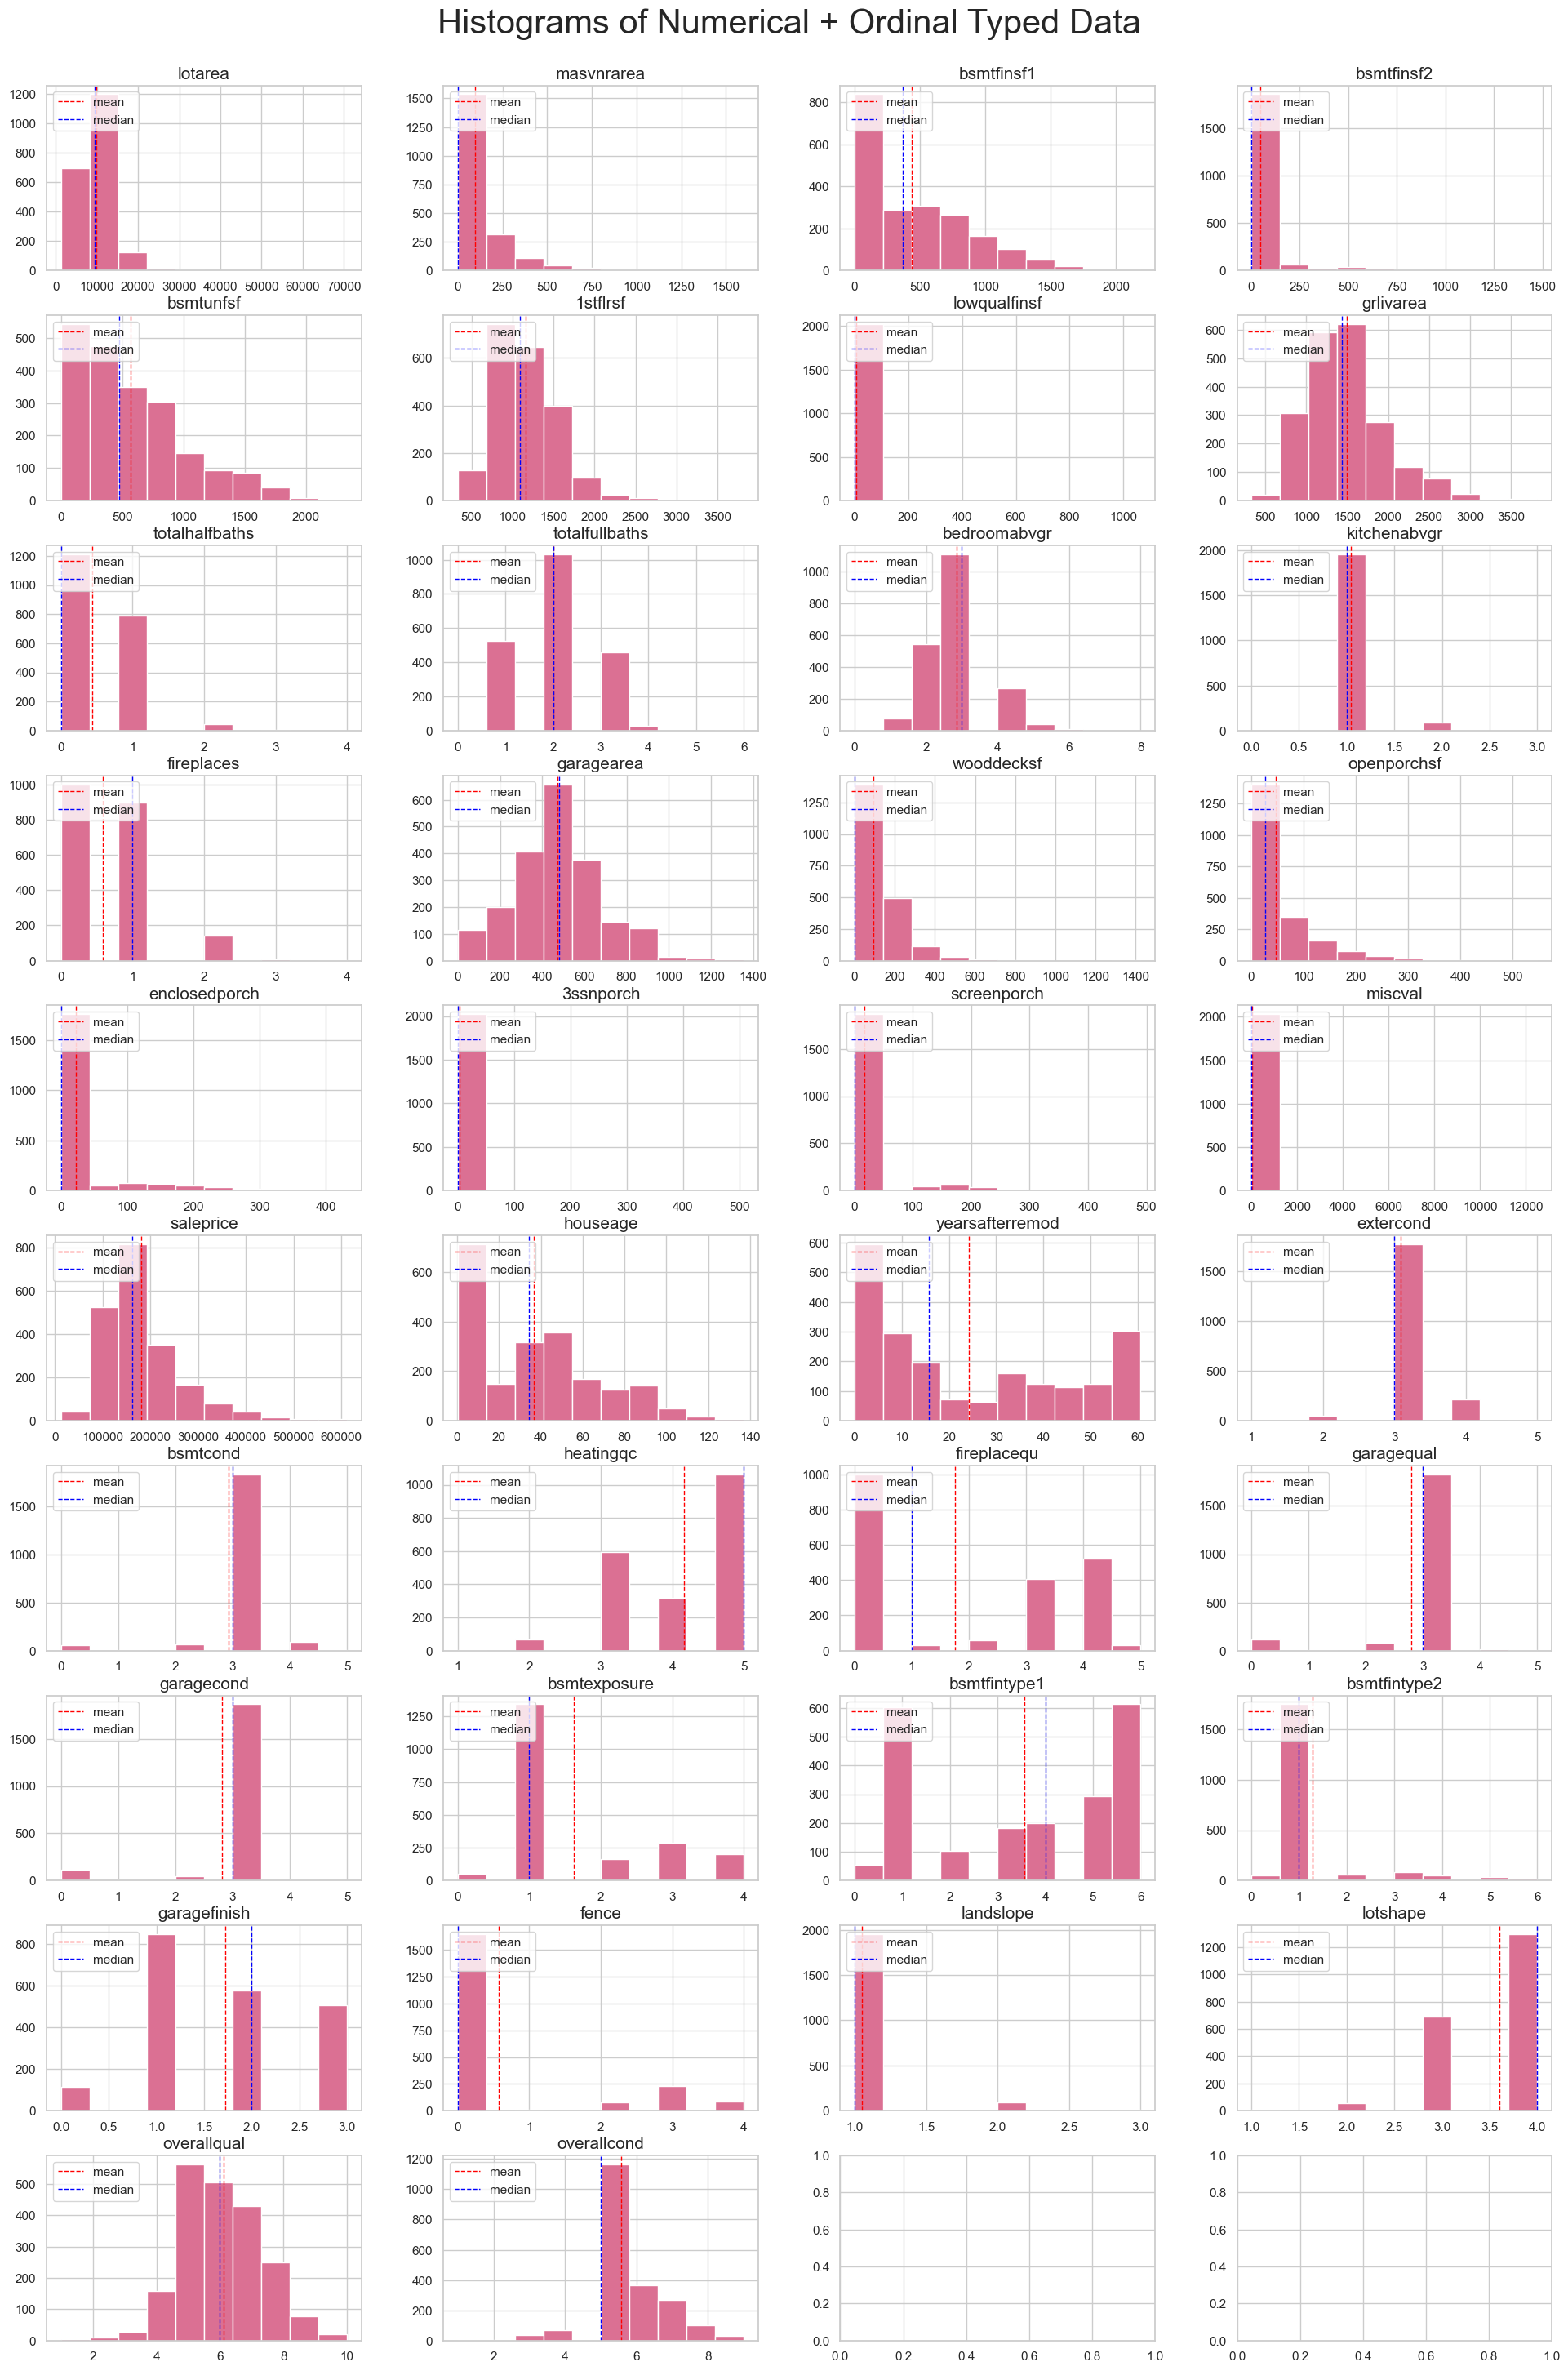

In [192]:
subplot_hist(train_num_cleaned.join(ordinal_data),train_num_cleaned.join(ordinal_data).columns, 
                "Histograms of Numerical + Ordinal Typed Data", train_num_cleaned.join(ordinal_data).columns,(20,30));

In [193]:
nominal_df.shape

(2047, 26)

In [194]:
def subplot_countplot(dataframe,list_of_columns, suptitle, list_of_titles,datafigsize):
    fig, ax = plt.subplots((len(list_of_columns)//4)+1, 4,figsize= datafigsize) 
    fig.suptitle(suptitle,fontsize=30)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout(w_pad = 3.5,h_pad = 3.5,pad=5.0);    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(data=dataframe,x=dataframe[column],ax=ax[i],color="palevioletred",order=dataframe[column].value_counts().index) 
        ax[i].set_title(list_of_titles[i],fontdict={'fontsize': 20}) 
        ax[i].yaxis.set_visible(False)
        ax[i].xaxis.set_visible(True)

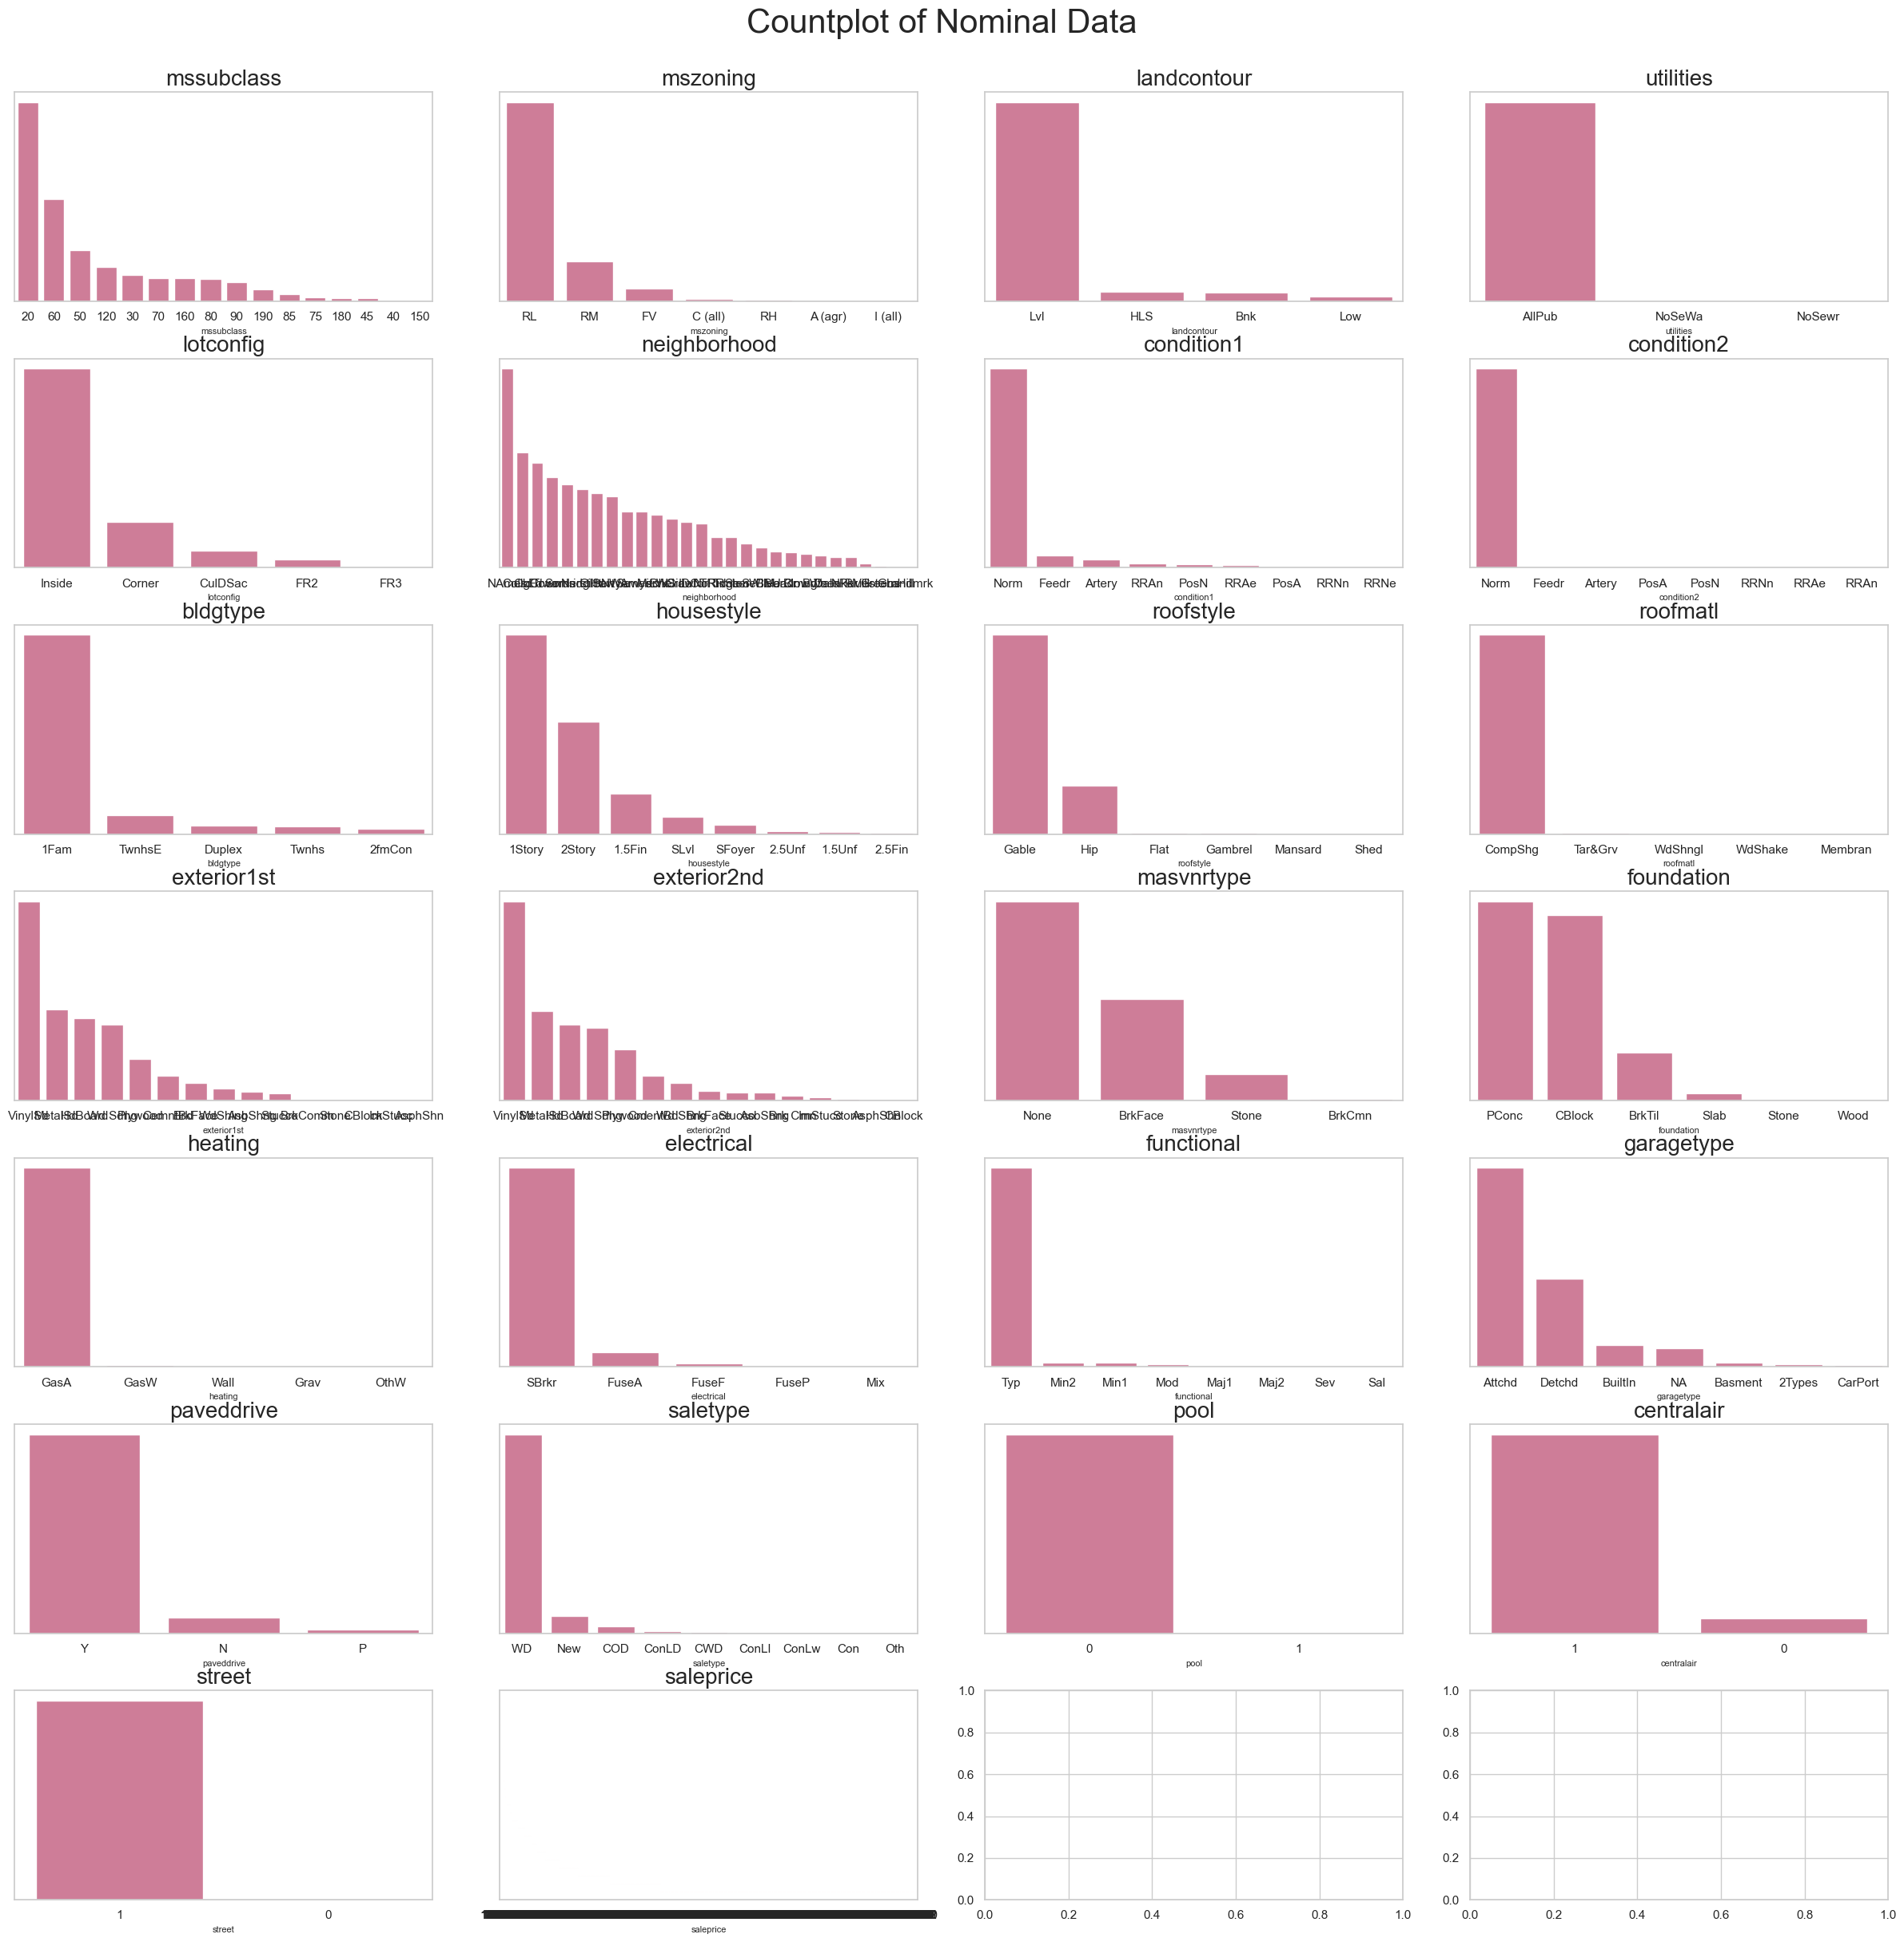

In [195]:
subplot_countplot(nominal_df,nominal_df.columns, "Countplot of Nominal Data", nominal_df.columns,(25,25))

In [196]:
def valuecount(df,col):
    for i in col:
        print(df[i].value_counts())
        print('\n')
        print('Number of unique values:')
        print(df[i].nunique())
        print ('***********************************')

In [197]:
# Let's take a look at the 26 columns. 
print('Taking a look at all columns numbers:')

valuecount(nominal_df,nominal_df.columns)

Taking a look at all columns numbers:
20     768
60     393
50     197
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: mssubclass, dtype: int64


Number of unique values:
16
***********************************
RL         1594
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: mszoning, dtype: int64


Number of unique values:
7
***********************************
Lvl    1843
HLS      85
Bnk      78
Low      41
Name: landcontour, dtype: int64


Number of unique values:
4
***********************************
AllPub    2045
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64


Number of unique values:
3
***********************************
Inside     1502
Corner      347
CulDSac     129
FR2          60
FR3           9
Name: lotconfig, dtype: int64


Number of unique values:
5
***********************************
NAmes      310
CollgCr 

In [198]:
skew_df = train_num_cleaned.join(ordinal_data)
skew_df.skew(axis = 0, skipna = True) 

lotarea             3.950390
masvnrarea          2.573677
bsmtfinsf1          0.812343
bsmtfinsf2          4.236401
bsmtunfsf           0.909412
1stflrsf            0.965381
lowqualfinsf       11.489847
grlivarea           0.927186
totalhalfbaths      0.895441
totalfullbaths      0.450409
bedroomabvgr        0.370258
kitchenabvgr        4.343389
fireplaces          0.713455
garagearea          0.158089
wooddecksf          2.024652
openporchsf         2.243449
enclosedporch       2.861210
3ssnporch          11.815445
screenporch         3.854646
miscval            18.580145
saleprice           1.561498
houseage            0.606187
yearsafterremod     0.447893
extercond           1.235705
bsmtcond           -3.476382
heatingqc          -0.579134
fireplacequ         0.183639
garagequal         -3.234036
garagecond         -3.385160
bsmtexposure        1.127531
bsmtfintype1       -0.166651
bsmtfintype2        3.130675
garagefinish        0.114455
fence               1.765980
landslope     

**Observations on Skewness:**
1. Based on histograms and statistical data, we observe that these data are highly positively skewed.
    - lotarea, bsmtfinsf2, lowqualfinsf, miscval, bsmtfintype2, landslope
    - Extremely skewed dataset for "lowqualfinsf" and "miscval". We will drop the columns.
2. Bathroom-related data are highly sparse. Suggest that we explore combining the columns for better representation of number of bathrooms for house. 
3. To investigate the relationship between Open Porch, 3 Season Porch, Enclosed Porch and Screen Porch. Consider combining data.
4. To investigate the correlation of Exterior 1 and 2.
5. To investigate the correlation between Condition 1 and 2.
6. To investigate the outliers for Utilities.
7. Investigate Streets. 
8. Roofmatl and Electrical - Highly skewed (to be made boolean based on above analysis)

**Skew Investigation**

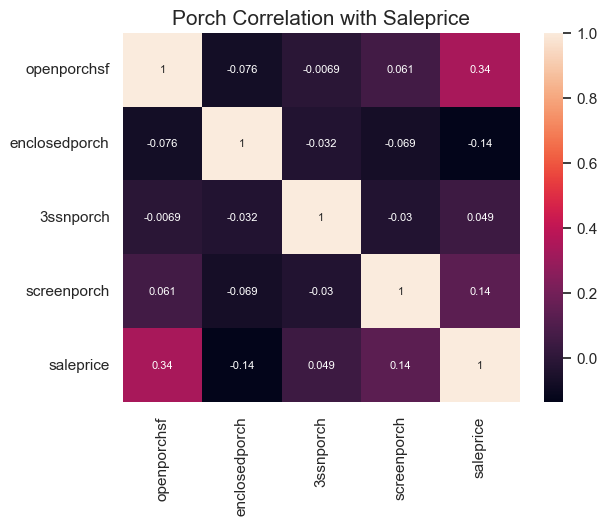

In [199]:
#3. Investigate the relationship between all porches.
porch_cols = ['openporchsf','enclosedporch','3ssnporch','screenporch']
porch = train_cleaned[porch_cols]
porch_corr = porch.join(train_cleaned['saleprice']).corr()
sns.heatmap(porch_corr,annot=True)
plt.title("Porch Correlation with Saleprice");

In [200]:
round(porch.describe(),2)

openporchsf  enclosedporch  3ssnporch  screenporch
count      2047.00        2047.00    2047.00      2047.00
mean         47.20          22.62       2.60        16.54
std          65.88          59.90      25.25        57.43
min           0.00           0.00       0.00         0.00
25%           0.00           0.00       0.00         0.00
50%          26.00           0.00       0.00         0.00
75%          70.00           0.00       0.00         0.00
max         547.00         432.00     508.00       490.00

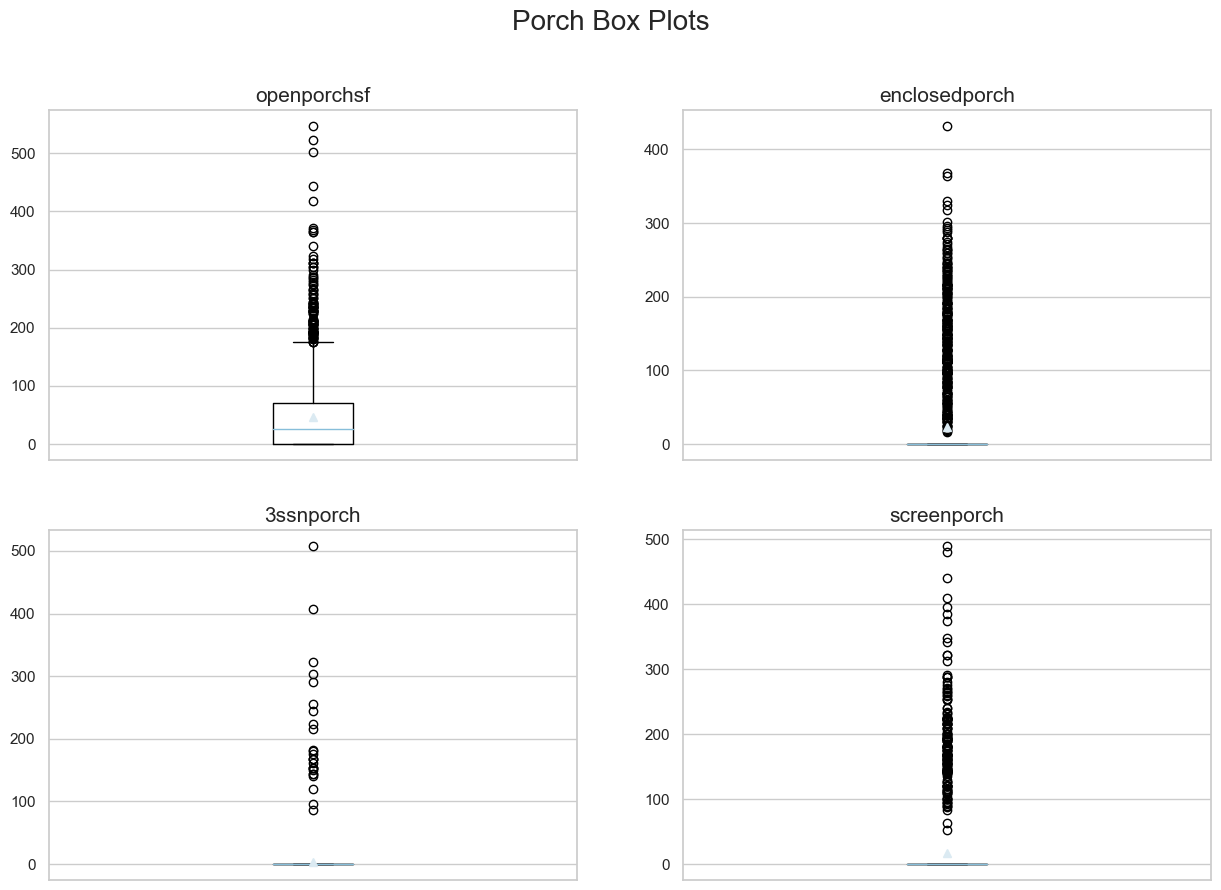

In [201]:
subplot_boxplot(porch,porch_cols,'Porch Box Plots',porch_cols,(30,20))

In [202]:
porch.head()

openporchsf  enclosedporch  3ssnporch  screenporch
0           44              0          0            0
1           74              0          0            0
2           52              0          0            0
3            0              0          0            0
4           59              0          0            0

In [203]:
cols= ['Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch']
print('No porch present:')
print(porch[(porch.iloc[:,0]==0) & (porch.iloc[:,1]==0)& 
            (porch.iloc[:,2]==0)& (porch.iloc[:,3]==0)].shape)
print('At least 1 porch present:')
print(porch[(porch.iloc[:,0]>1) | (porch.iloc[:,1]>1)| 
            (porch.iloc[:,2]>1)| (porch.iloc[:,3]>1)].shape)

No porch present:
(613, 4)
At least 1 porch present:
(1434, 4)


In [204]:
no_porch = porch[(porch.iloc[:,0]==0) & (porch.iloc[:,1]==0)& (porch.iloc[:,2]==0)& (porch.iloc[:,3]==0)]
porch_present = porch[(porch.iloc[:,0]>1) | (porch.iloc[:,1]>1)| (porch.iloc[:,2]>1)| (porch.iloc[:,3]>1)]

no_porch['saleprice']= train_cleaned['saleprice']
porch_present['saleprice']= train_cleaned['saleprice']
round(porch_present['saleprice'].mean()/no_porch['saleprice'].mean()-1,2)

0.38

**Analysis of Porch**
- There is not much correlation between porch columns. This suggest that only few households have more than 1 porch. 
- Data for 3Ssn, Enclosed, and Screen porches are highly dispersed. 
- The correlation of all four porches to salesprice is not significant. openporchsf has the highest correlation, perhaps by virtue of having the most datapoints available as well. 
- There is a 38% premium over having at least 1 porch than no porch. We have to modify this data to simplify our dataframe:
    1. We can simply make it a boolean: Porch or no Porch
    2. We can modify to make it a column showing the number of porch 

In [205]:
# We will go ahead with the first suggestion and drop the 4 columns:
train_cleaned['porch'] = train_cleaned[porch_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
test_cleaned['porch'] = test_cleaned[porch_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
train_cleaned['porch'].nunique()

2

In [206]:
#4 To investigate the correlation of Exterior 1 and 2.
excols= ['exterior1st','exterior2nd']
exterior = train_cleaned[excols]
print(exterior.iloc[:,0].unique().shape)
print(exterior.iloc[:,1].unique().shape)
ex1_uniq= exterior.iloc[:,0].unique()
ex2_uniq=exterior.iloc[:,1].unique()

(15,)
(15,)


In [207]:
#Obtaining list of unique materials
ex_list=[*ex1_uniq,*ex2_uniq]
ex_list_unique= list(dict.fromkeys(ex_list))
print(ex_list_unique)

['HdBoard', 'VinylSd', 'Wd Sdng', 'BrkFace', 'Plywood', 'MetalSd', 'AsbShng', 'CemntBd', 'WdShing', 'Stucco', 'BrkComm', 'Stone', 'CBlock', 'ImStucc', 'AsphShn', 'CmentBd', 'Wd Shng', 'Brk Cmn']


In [208]:
ex_dict = {'HdBoard':"Wood", 'VinylSd':"Plastic", 'Wd Sdng':"Wood", 
        'BrkFace':"Sand", 'Plywood':"Wood", 'MetalSd':"Metal", 
        'AsbShng':"Others", 'CemntBd':"Cement", 'WdShing':"Wood", 
        'Stucco':"Others", 'BrkComm':"Sand", 'Stone':"Sand", 
        'CBlock':"Sand", 'ImStucc':"Others", 'AsphShn':"Others", 
        'CmentBd':"Cement", 'Wd Shng':"Wood", 'Brk Cmn':"Sand"}
train_cleaned['exterior1st'] = train_cleaned['exterior1st'].map(ex_dict)
train_cleaned['exterior2nd'] = train_cleaned['exterior2nd'].map(ex_dict)

test_cleaned['exterior1st'] = test_cleaned['exterior1st'].map(ex_dict)
test_cleaned['exterior2nd'] = test_cleaned['exterior2nd'].map(ex_dict)

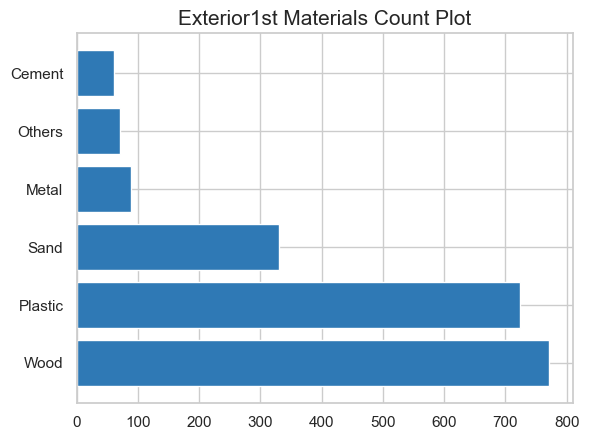

In [209]:
plt.barh(train_cleaned['exterior1st'].unique(),
         train_cleaned['exterior1st'].value_counts())
plt.title("Exterior1st Materials Count Plot");

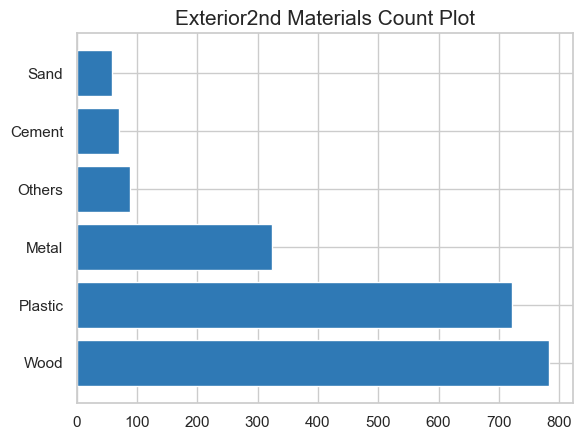

In [210]:
plt.barh(train_cleaned['exterior2nd'].unique(),
         train_cleaned['exterior2nd'].value_counts())
plt.title("Exterior2nd Materials Count Plot");

In [211]:
train_cleaned['exterior1st'].unique()

array(['Wood', 'Plastic', 'Sand', 'Metal', 'Others', 'Cement'],
      dtype=object)

In [212]:
ex_tag_dict = {'Wood':1, 'Plastic':2, 'Sand':3, 'Metal':4, 'Others':6, 'Cement':5}
train_cleaned['exterior1st'] = train_cleaned['exterior1st'].map(ex_tag_dict)
train_cleaned['exterior2nd'] = train_cleaned['exterior2nd'].map(ex_tag_dict)

test_cleaned['exterior1st'] = test_cleaned['exterior1st'].map(ex_tag_dict)
test_cleaned['exterior2nd'] = test_cleaned['exterior2nd'].map(ex_tag_dict)

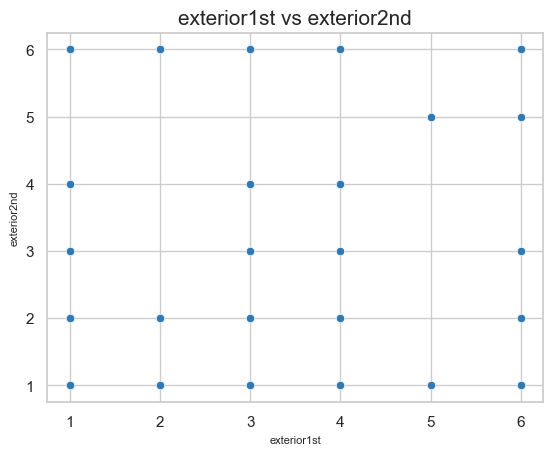

In [213]:
sns.scatterplot(x='exterior1st',y='exterior2nd' ,data=train_cleaned).set_title('exterior1st vs exterior2nd');

There seems to be no conclusion on the Exterior 1st and Exterior 2nd data. Hence I will leave it as it is, without removing columns. 

In [214]:
#5 To investigate the correlation between Condition 1 and 2.
concols= ['condition1','condition2']
conds = train_cleaned[concols]
print(conds.iloc[:,0].unique().shape)
print(conds.iloc[:,1].unique().shape)
cond1_uniq= conds.iloc[:,0].unique()
cond2_uniq=conds.iloc[:,1].unique()

(9,)
(8,)


In [215]:
cond_list=[*cond1_uniq,*cond2_uniq]
cond_list_unique= list(dict.fromkeys(cond_list))
print(cond_list_unique)

['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe', 'RRNn']


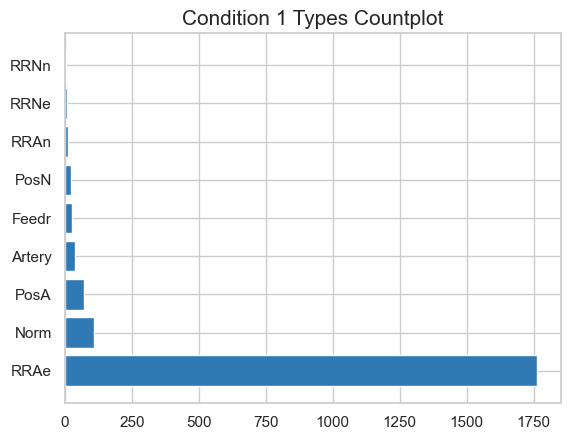

In [216]:
plt.barh(train_cleaned['condition1'].unique(),
         train_cleaned['condition1'].value_counts())
plt.title('Condition 1 Types Countplot');

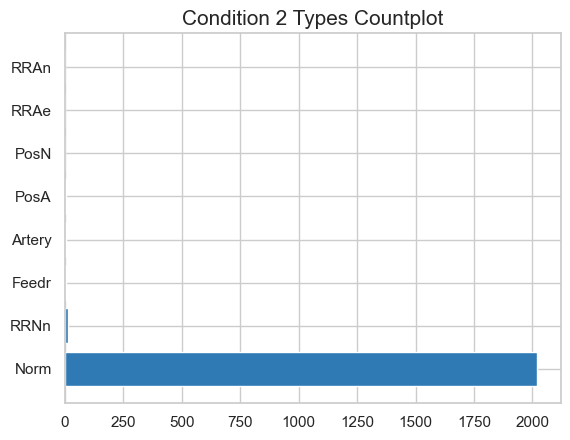

In [217]:
plt.barh(train_cleaned['condition2'].unique(),
         train_cleaned['condition2'].value_counts())
plt.title('Condition 2 Types Countplot');

In [218]:
 train_cleaned['condition1'].value_counts()

Norm      1764
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition1, dtype: int64

In [219]:
round(train_cleaned.groupby('condition1')['saleprice'].mean(),0)

condition1
Artery    128765.0
Feedr     143068.0
Norm      184889.0
PosA      254733.0
PosN      254794.0
RRAe      139686.0
RRAn      172605.0
RRNe      129617.0
RRNn      198208.0
Name: saleprice, dtype: float64

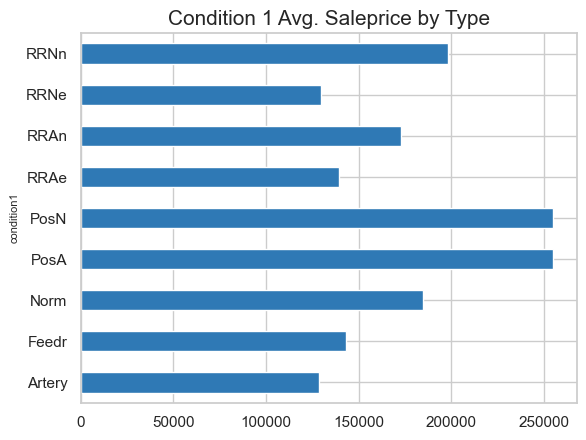

In [220]:
train_cleaned.groupby('condition1').saleprice.mean().plot.barh()
plt.title('Condition 1 Avg. Saleprice by Type');

In [221]:
 train_cleaned['condition2'].value_counts()

Norm      2021
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition2, dtype: int64

1. Will be dropping Condition 2 since majority of the data are concentrated in one datapoint (Artery).
2. Even though data is highly skewed to Artery, from the bar chart above, SalePrice does not seem very affected by "Artery", but more affected by "PosN" and "PosA"
    - Will be classifying Condition 1 into Non_Pos and Pos, where Pos include PosN and PosA


In [222]:
cond_dict = {'RRAe':0, 'Norm':0, 'PosA':1, 'Artery':0, 
             'Feedr':0, 'PosN':1, 'RRAn':0, 'RRNe':0, 'RRNn':0}
train_cleaned['condition1'] = train_cleaned['condition1'].map(cond_dict)
test_cleaned['condition1'] = test_cleaned['condition1'].map(cond_dict)

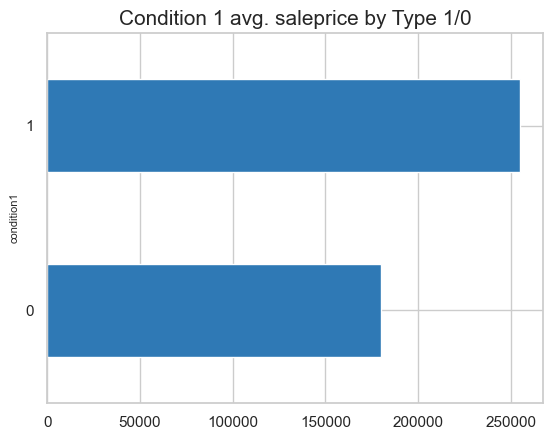

In [223]:
train_cleaned.groupby('condition1').saleprice.mean().plot.barh()
plt.title('Condition 1 avg. saleprice by Type 1/0');

In [224]:
#6 To investigate the outliers for Utilities.
    #data = NoSewr, NoSeWa
train_cleaned[(train_cleaned['utilities'] =="NoSeWa") 
              |(train_cleaned['utilities'] =="NoSewr")]

id mssubclass mszoning  lotarea  street  lotshape landcontour utilities  \
561  956         20       RL    14375       1         3         Lvl    NoSeWa   
581  946         30  I (all)    21780       0         4         Lvl    NoSewr   

    lotconfig  landslope  ... fence  miscval saletype saleprice   houseage  \
561   CulDSac          1  ...   0.0        0      COD    137500  51.083333   
581    Inside          1  ...   0.0        0    ConLD     57625  99.250000   

     yearsafterremod  totalfullbaths totalhalfbaths pool  porch  
561        51.083333             1.0            1.0    0      1  
581        59.250000             1.0            0.0    0      1  

[2 rows x 65 columns]

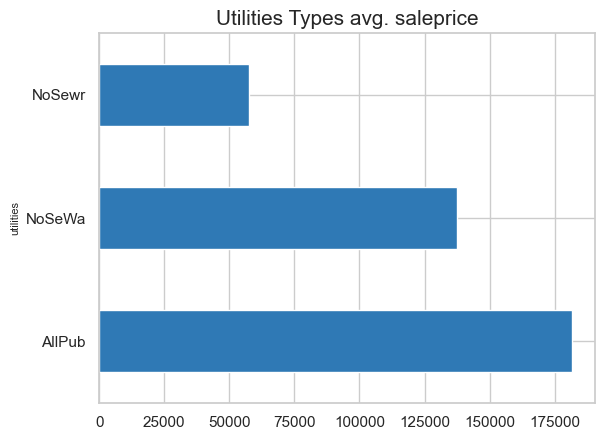

In [225]:
train_cleaned.groupby('utilities').saleprice.mean().plot.barh()
plt.title('Utilities Types avg. saleprice');

There is little point to keep the Utilities column as model will not be trained effectively with only one datapoint for NoSewr and NoSeWa, even though the two datapoints do seem to affect prices a lot. 

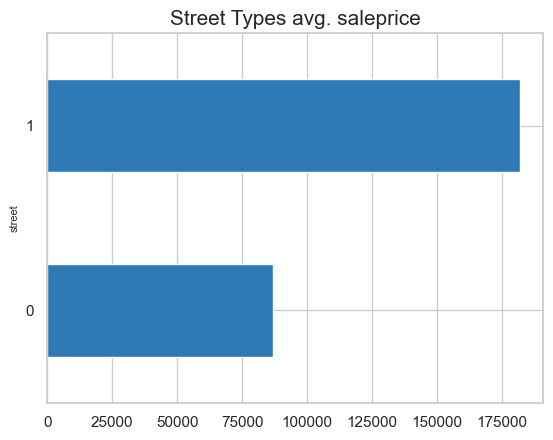

In [226]:
#7. Investigate streets
train_cleaned.groupby('street').saleprice.mean().plot.barh()
plt.title('Street Types avg. saleprice');

In [227]:
train_cleaned.loc[train_cleaned['saletype']=='New','saletype'] = 1
test_cleaned.loc[test_cleaned['saletype']=='New','saletype'] = 1

In [228]:
train_cleaned.loc[((train_cleaned['saletype']!='New') & (train_cleaned['saletype']!=1)),'saletype'] = 0
test_cleaned.loc[((test_cleaned['saletype']!='New') & (test_cleaned['saletype']!=1)),'saletype'] = 0

In [229]:
train_cleaned.loc[train_cleaned['electrical']=='SBrkr','electrical'] = 1
test_cleaned.loc[test_cleaned['electrical']=='SBrkr','electrical'] = 1

In [230]:
train_cleaned.loc[((train_cleaned['electrical']!='SBrkr') & (train_cleaned['electrical']!=1)),'electrical'] = 0
test_cleaned.loc[((test_cleaned['electrical']!='SBrkr') & (test_cleaned['electrical']!=1)),'electrical'] = 0

In [231]:
print(train_cleaned['saletype'].value_counts())
print(train_cleaned['electrical'].value_counts())
print('\n')
print(test_cleaned['saletype'].value_counts())
print(test_cleaned['electrical'].value_counts())

0    1889
1     158
Name: saletype, dtype: int64
1    1864
0     183
Name: electrical, dtype: int64


0    800
1     79
Name: saletype, dtype: int64
1    814
0     65
Name: electrical, dtype: int64


Similarly, I will  be dropping Street as data is highly skewed towards Pave, which would not train our model well.

**Columns that we have decided to drop & Reasons**
1. lowqualfinsf, miscval - extremely skewed dataset. Training data does not observe many other values in these two columns hence it is not useful for our regression.
2. openporchsf, enclosedporch, 3ssnporch, screenporch. This is because we have decided to make it a boolean of whether house has porch presence or not. Hence, we have already create the boolean column above.
3. condition2: Majority of the data are concentrated in one datapoint (Artery).
4. utilities & street: Data is highly skewed towards one category within utilities/street. Hence we will drop the columns.

In [232]:
print("Before removing columns:")
print(train_cleaned.shape)

Before removing columns:
(2047, 65)


In [233]:
# Drop highly skewed columns (2)
train_cleaned.drop(columns=['lowqualfinsf', 'miscval'],inplace=True)
test_cleaned.drop(columns=['lowqualfinsf', 'miscval'],inplace=True)

In [234]:
# Drop porch columns (4)
train_cleaned.drop(columns=['openporchsf', 'enclosedporch', '3ssnporch', 'screenporch'],inplace=True)
test_cleaned.drop(columns=['openporchsf', 'enclosedporch', '3ssnporch', 'screenporch'],inplace=True)

In [235]:
# Drop condition2 (1)
train_cleaned.drop(columns="condition2",inplace=True)
test_cleaned.drop(columns="condition2",inplace=True)

In [236]:
# Drop utilities/street (2)
train_cleaned.drop(columns=["street",'utilities'],inplace=True)
test_cleaned.drop(columns=["street",'utilities'],inplace=True)

In [237]:
# Drop exterior1st (1)
train_cleaned.drop(columns="exterior1st",inplace=True)
test_cleaned.drop(columns="exterior1st",inplace=True)

In [238]:
# Drop roofmatl, heating (2)
train_cleaned.drop(columns=["roofmatl",'heating'],inplace=True)
test_cleaned.drop(columns=["roofmatl",'heating'],inplace=True)
train_cleaned.shape

(2047, 53)

Columns are dropped successfully. 

#### Exporting Cleaned Train Data

In [239]:
# Saving my cleaned train dataset:
train_cleaned.to_csv('../data/train_cleaned.csv',index=False)

# Saving my cleaned test dataset:
test_cleaned.to_csv('../data/test_cleaned.csv',index=False)

**Additional (For My Reference for next notebook)**

In [240]:
# 'error'
nominal_df['porch'] = train_cleaned['porch']

In [241]:
nominal_df.drop(columns=["exterior1st","street",'utilities',"condition2",'roofmatl','heating'],inplace=True)

In [242]:
nominal_df.drop(columns=['saleprice'],inplace=True)

In [243]:
train_num_cleaned.drop(columns=['openporchsf', 'enclosedporch', '3ssnporch', 'screenporch','lowqualfinsf', 'miscval'],inplace=True)

In [244]:
(len(nominal_df.columns) 
+ len(train_num_cleaned.columns) 
+ len(ordinal_data.columns)+ 1)  # This is for ID column

53

In [245]:
len(train_cleaned.columns)

53

In [246]:
union = (set(nominal_df.columns) | set(train_num_cleaned.columns) | set(ordinal_data.columns))
total = set(train_cleaned.columns)

In [247]:
print(total-union)
print(union-total)

{'id'}
set()


In [248]:
train_num_cleaned.columns

Index(['lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf',
       '1stflrsf', 'grlivarea', 'totalhalfbaths', 'totalfullbaths',
       'bedroomabvgr', 'kitchenabvgr', 'fireplaces', 'garagearea',
       'wooddecksf', 'saleprice', 'houseage', 'yearsafterremod'],
      dtype='object')

In [249]:
ordinal_data.columns

Index(['extercond', 'bsmtcond', 'heatingqc', 'fireplacequ', 'garagequal',
       'garagecond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'garagefinish', 'fence', 'landslope', 'lotshape', 'overallqual',
       'overallcond'],
      dtype='object')

In [250]:
nominal_df.columns

Index(['mssubclass', 'mszoning', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'bldgtype', 'housestyle', 'roofstyle', 'exterior2nd',
       'masvnrtype', 'foundation', 'electrical', 'functional', 'garagetype',
       'paveddrive', 'saletype', 'pool', 'centralair', 'porch'],
      dtype='object')

In [251]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2050
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2047 non-null   int64  
 1   mssubclass       2047 non-null   object 
 2   mszoning         2047 non-null   object 
 3   lotarea          2047 non-null   int64  
 4   lotshape         2047 non-null   int64  
 5   landcontour      2047 non-null   object 
 6   lotconfig        2047 non-null   object 
 7   landslope        2047 non-null   int64  
 8   neighborhood     2047 non-null   object 
 9   condition1       2047 non-null   int64  
 10  bldgtype         2047 non-null   object 
 11  housestyle       2047 non-null   object 
 12  overallqual      2047 non-null   int64  
 13  overallcond      2047 non-null   int64  
 14  roofstyle        2047 non-null   object 
 15  exterior2nd      2047 non-null   int64  
 16  masvnrtype       2047 non-null   object 
 17  masvnrarea    